In [3]:
from auxilar import funt,SystemEdos
from Metodos_numericos import runge_kutta_system,Euler_Mod
from Graficos import *
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

In [4]:
fu_f="o+w*x*y-d*x"
fu_g=" a*y*(1-b*y)-x*y"

In [5]:
#Jacobian
import sympy as sp
x=sp.Symbol("x")
y=sp.Symbol("y")
a=sp.Symbol("α")
b=sp.Symbol("β")
d=sp.Symbol("δ")
w=sp.Symbol("ω")
o=sp.Symbol("σ")
dx=o+(w*x*y)-(d*x)
dy=a*y*(1-(b*y))-x*y
matrix=sp.Matrix([[dx,dy]])
jacobi=matrix.jacobian([x,y])

jacobi

Matrix([
[y*ω - δ,                       x*ω],
[     -y, -x - y*α*β + α*(-y*β + 1)]])

In [6]:
jacobi.eigenvals()

{-x/2 - y*α*β + y*ω/2 + α/2 - δ/2 - sqrt(x**2 + 4*x*y*α*β - 2*x*y*ω - 2*x*α - 2*x*δ + 4*y**2*α**2*β**2 + 4*y**2*α*β*ω + y**2*ω**2 - 4*y*α**2*β - 4*y*α*β*δ - 2*y*α*ω - 2*y*δ*ω + α**2 + 2*α*δ + δ**2)/2: 1,
 -x/2 - y*α*β + y*ω/2 + α/2 - δ/2 + sqrt(x**2 + 4*x*y*α*β - 2*x*y*ω - 2*x*α - 2*x*δ + 4*y**2*α**2*β**2 + 4*y**2*α*β*ω + y**2*ω**2 - 4*y*α**2*β - 4*y*α*β*δ - 2*y*α*ω - 2*y*δ*ω + α**2 + 2*α*δ + δ**2)/2: 1}

Como queda una matriz diagonal los valores propios son los valores de la diagonal

In [7]:
sub=jacobi.subs("x",0).subs("y",0)
sub

Matrix([
[-δ, 0],
[ 0, α]])

Numerical Method

In [26]:
def Numerical_Method(Method,Name,f,g,inicio=0,fin=0.1,h=0.01,x0=0,y0=0,print_Cycle=True,print_Values=True):
    for i in np.arange(inicio,fin,h):
        t,x,y=Method(f=f,g=g,x0=x0,y0=y0,a=inicio,b=fin,h=h)
        if(print_Cycle):
            print("x values")
            print(x)
            print("y values")
            print (y)
            plot(t,x,y,str(i))
            
    print("End")
    if(print_Values):
        print(x)
        print("x values")
        print (y)
        print("y values")
        
        
    plot(t,x,y,Name)
    

Euler Modificado

In [27]:
from Graficos import Plot_Fields
def Test_Numerical(Method=runge_kutta_system,Name="Runge_Kutta",x0=0,y0=0,a=1,
                   b=1,d=1,o=0,w=0,inicio=0,fin=0.1,
                   h=0.01,print_Cycle=True,Use_The_other_To=False,Print_Values=True):
    dic={"a":a,"b":b,"d":d,"o":o,"w":w}
    w_f=funt(fu_f)
    w_f.evaluate_params(dic)
    w_g=funt(fu_g)
    w_g.evaluate_params(dic)
    f=w_f.evaluate
    g=w_g.evaluate
    print(sub.subs("α",a).subs("β",b).subs("δ",d).subs("σ",o).subs("ω",w))
    Numerical_Method(Method=Method,Name=Name,f=f,g=g,x0=x0,y0=y0,inicio=inicio,fin=fin,h=h,
                     print_Cycle=print_Cycle,print_Values=Print_Values)
    plotdf([w_f.string().upper(),w_g.string().upper()])
    Plot_Fields(f,g)
    Sistem=SystemEdos(f,g)
    Isoclinas(Sistem.evaluate)
    Plano_Fase(f,g)
    if(Use_The_other_To and Name=="Runge_Kutta"):
        
        Test_Numerical(Method=Euler_Mod,Name="Euler_Mod",x0=x0,y0=y0,a=a,b=b,d=d,o=o,
                       w=w,inicio=inicio,fin=fin,
                       h=h,print_Cycle=print_Cycle,Print_Values=Print_Values)
        
    elif(Use_The_other_To and Name=="Euler_Mod"):
        Test_Numerical(Method=runge_kutta_system,Name="Runge_Kutta",x0=x0,y0=y0,a=a,b=b,d=d,o=o,
                       w=w,inicio=inicio,fin=fin
                       ,h=h,print_Cycle=print_Cycle,Print_Values=Print_Values)
    
    
    

    

Analizar en el pto (0,0)

Nodos estables

Para caso que a=-1 y d=1

Asintoticamente estable

Matrix([[-1, 0], [0, -1]])
x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


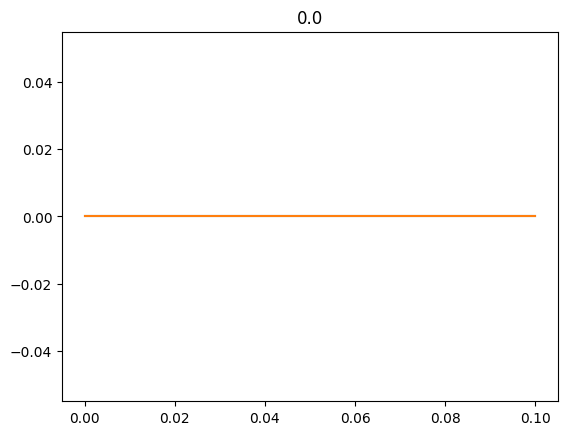

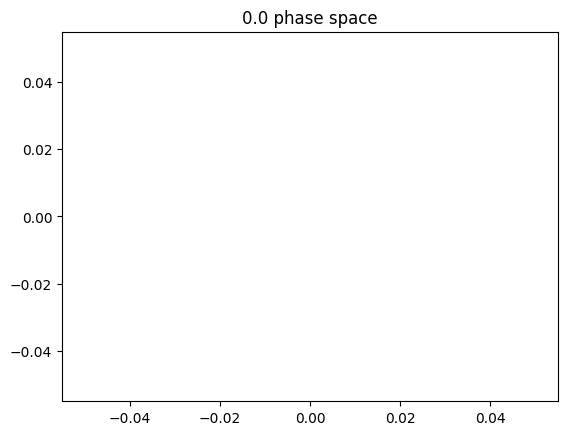

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


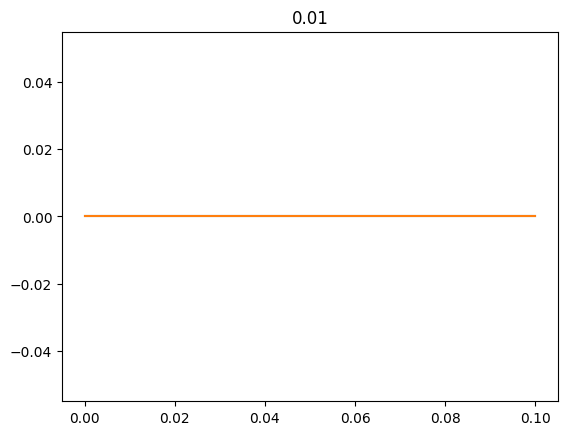

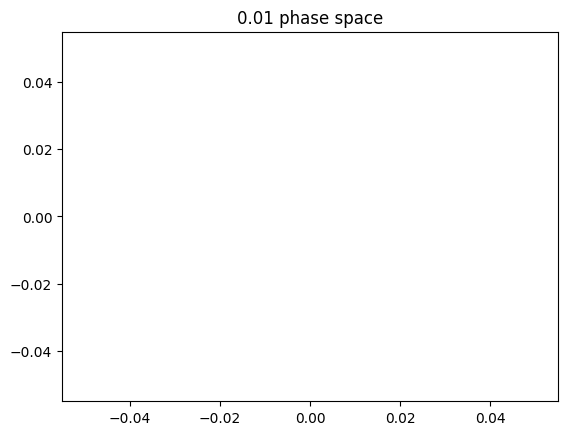

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


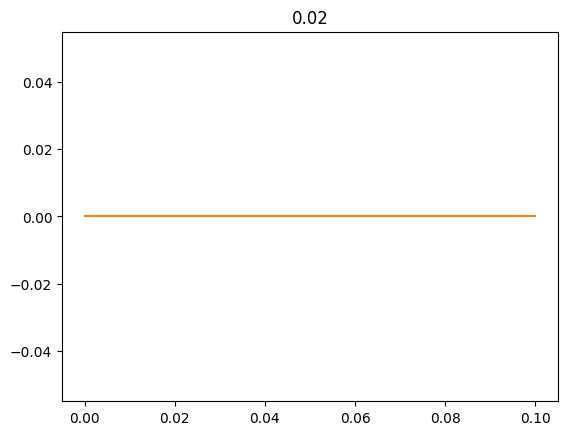

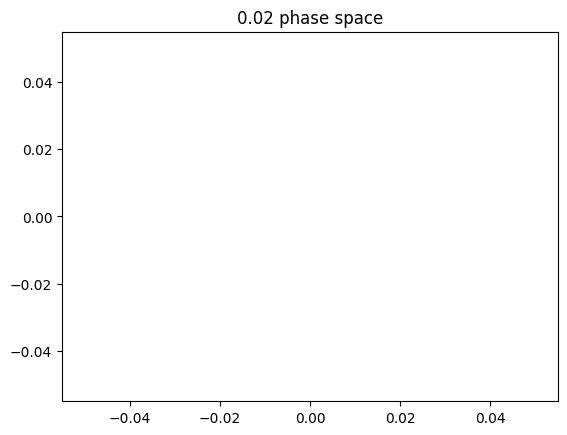

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


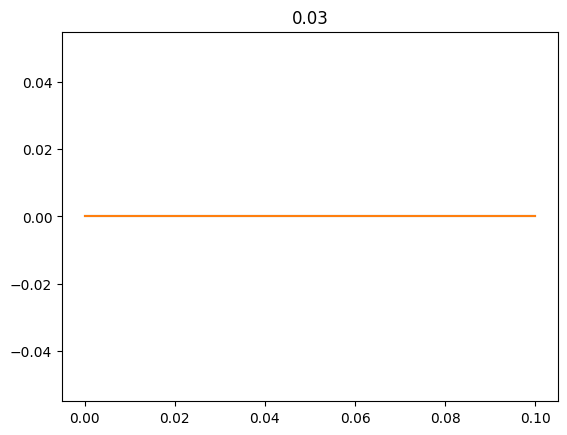

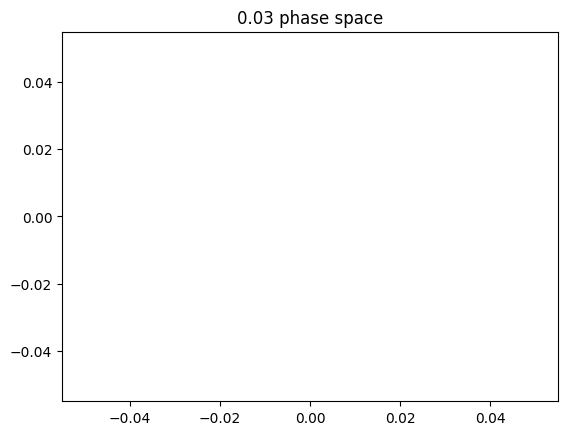

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


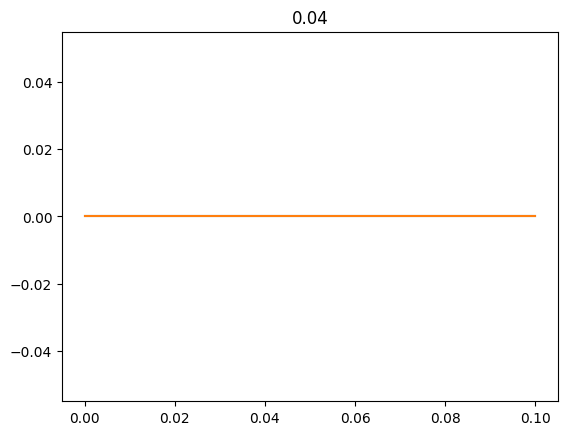

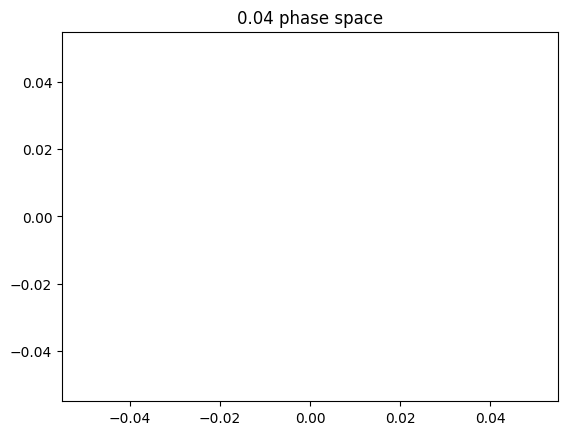

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


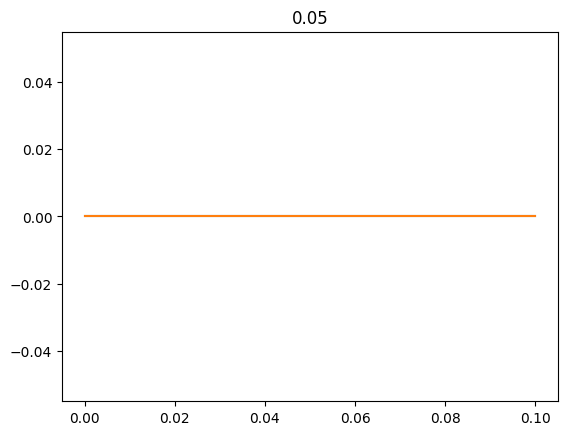

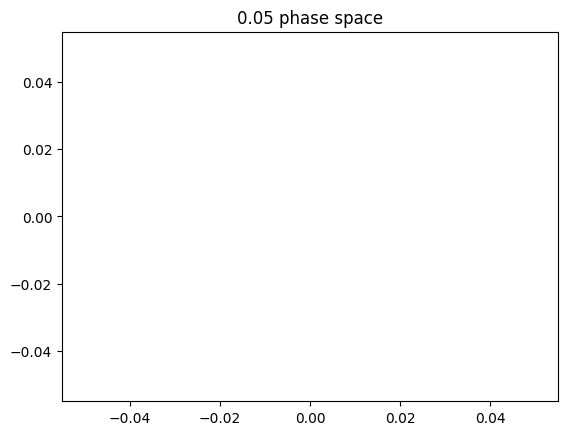

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


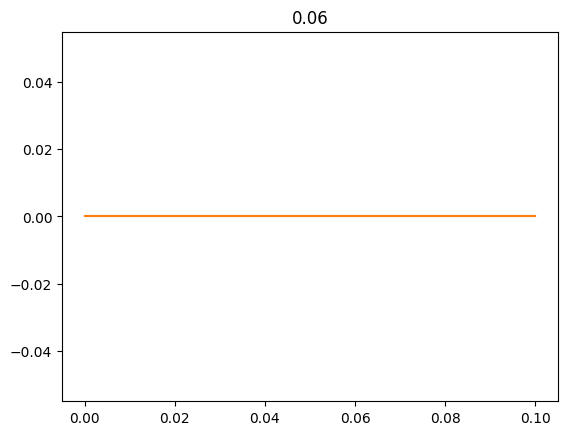

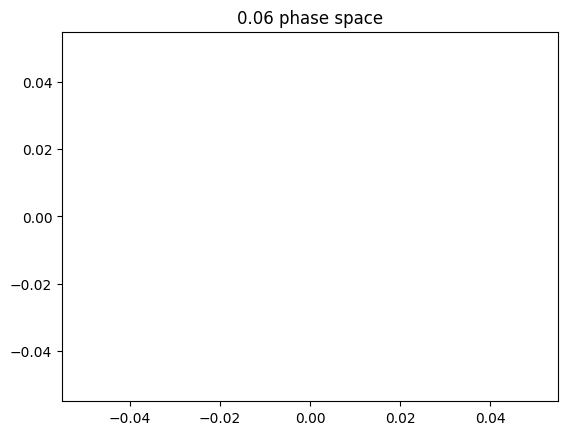

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


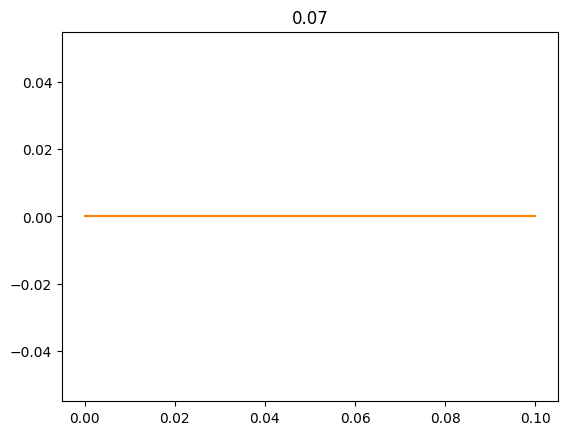

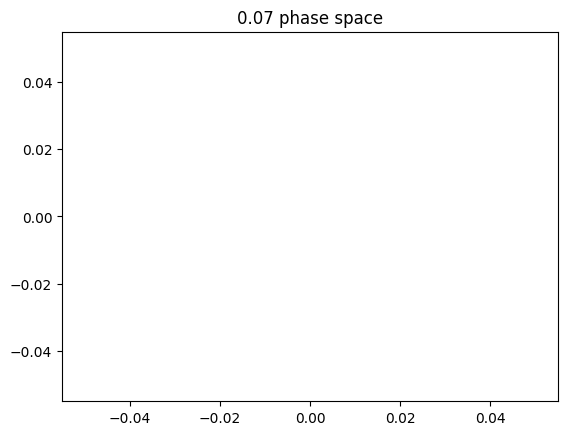

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


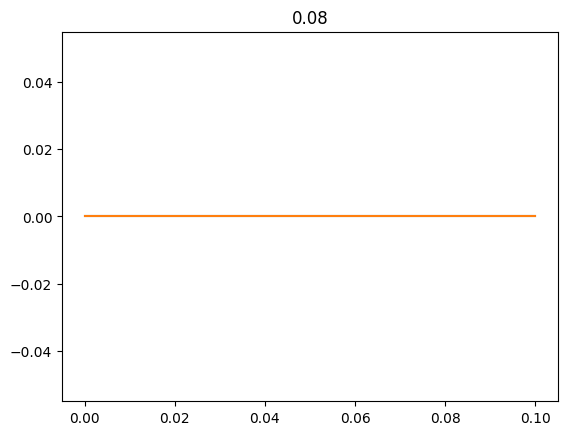

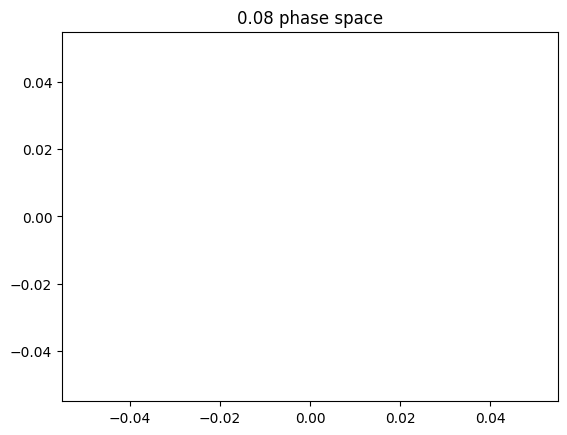

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


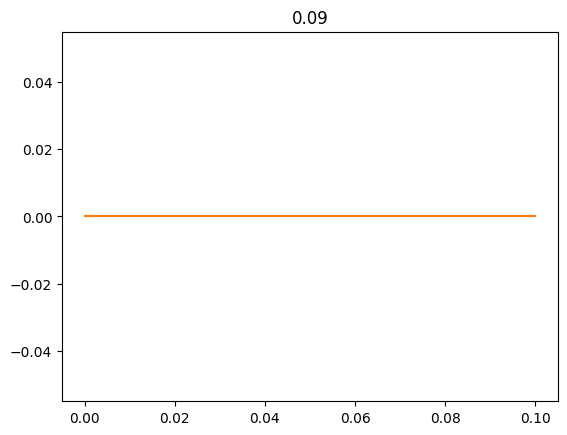

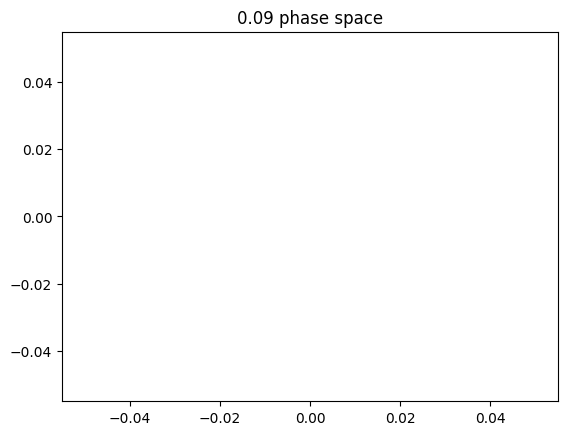

End
Show plot


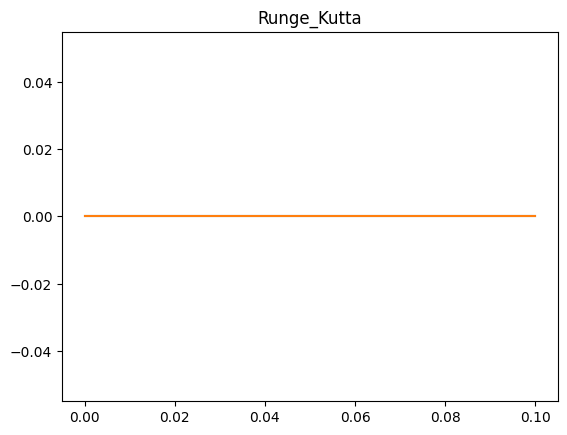

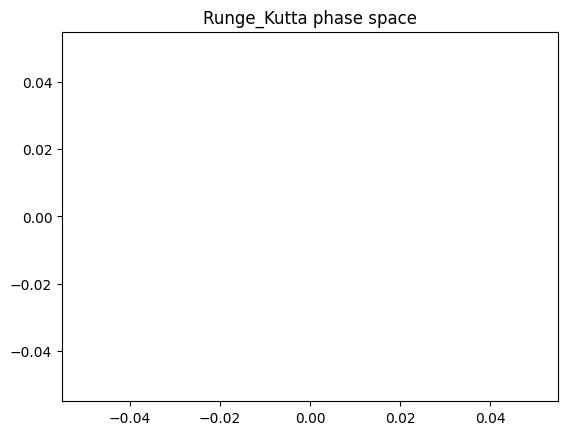

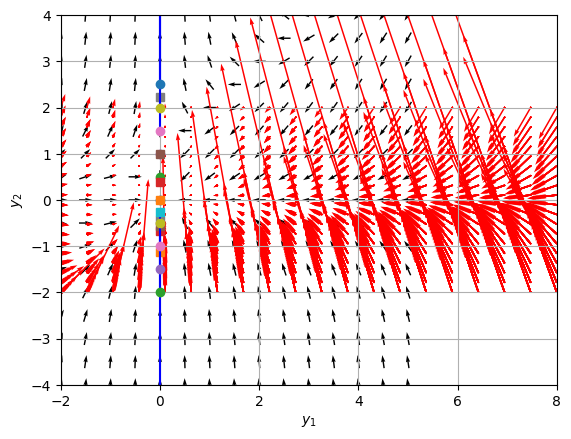

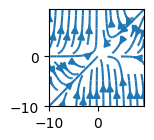

In [10]:
Test_Numerical(a=-1,d=1)

NODO Asintoticamente inestable 
Caso que w=0 o=0 y b=1
a=1 y d=-1

Matrix([[1, 0], [0, 1]])
x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


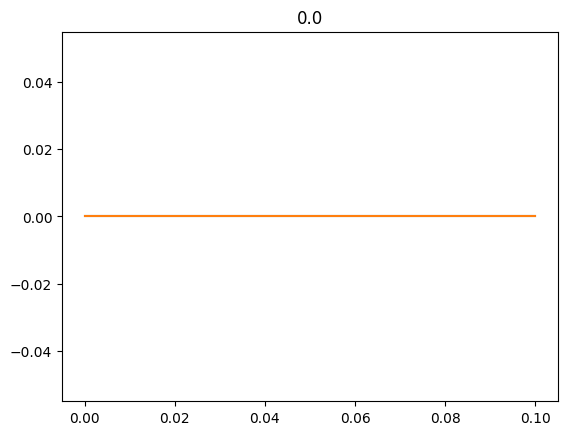

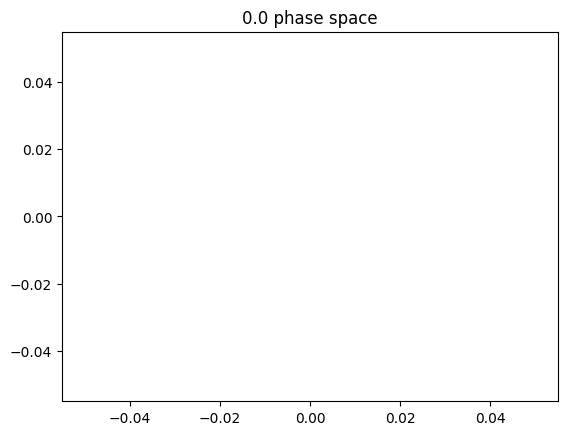

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


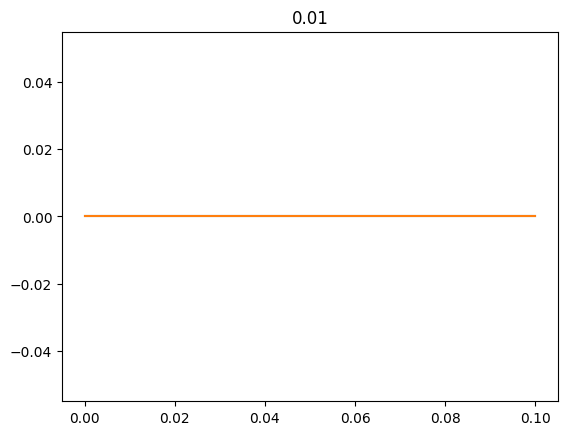

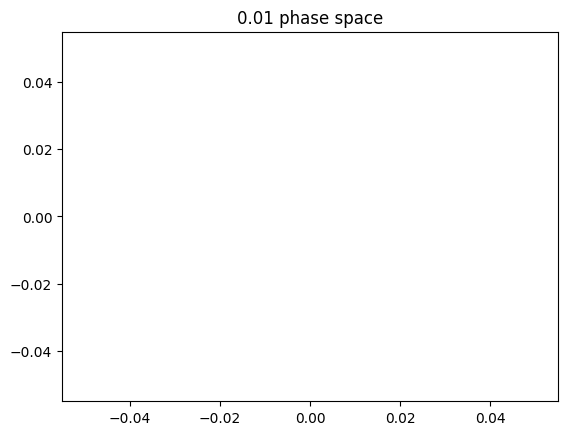

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


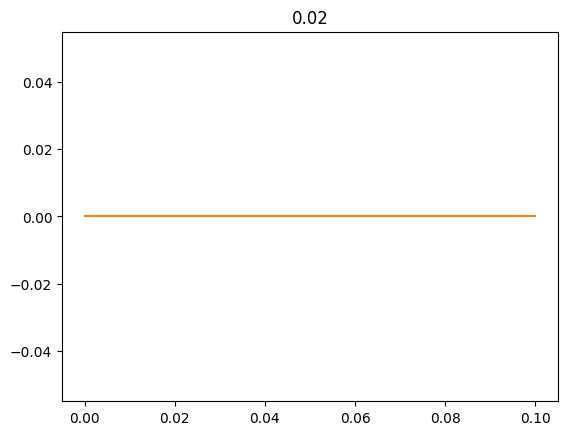

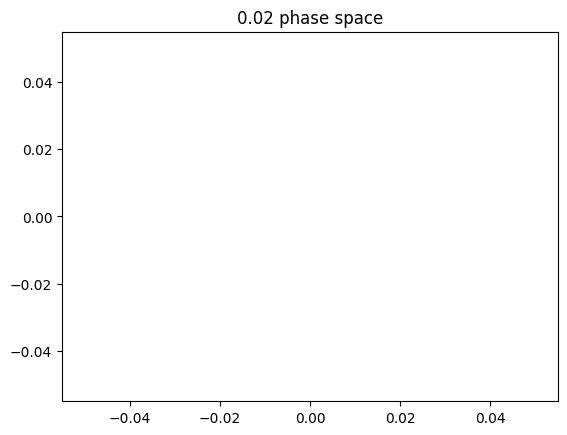

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


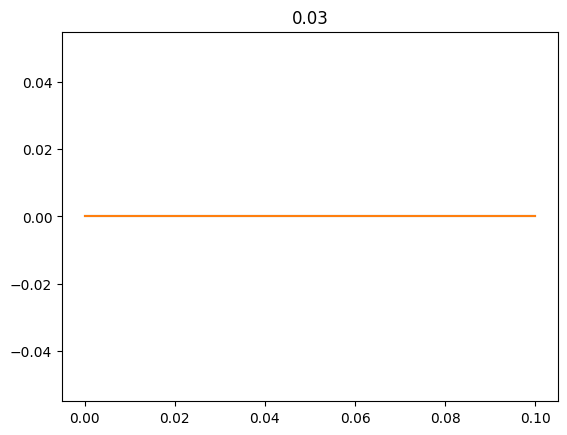

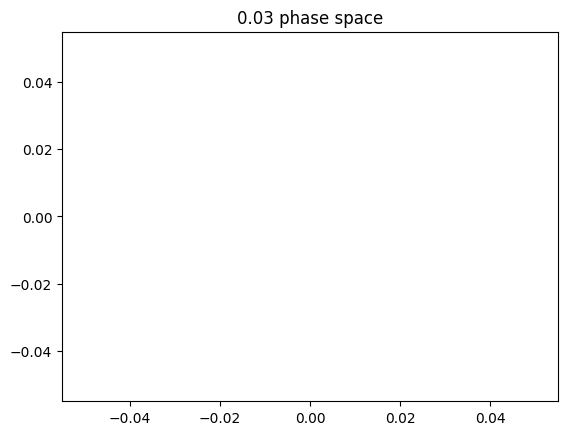

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


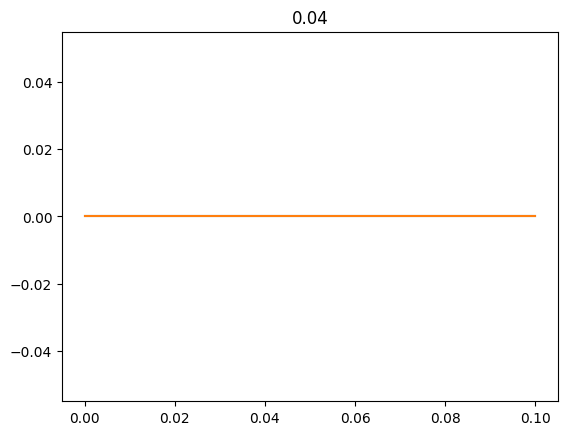

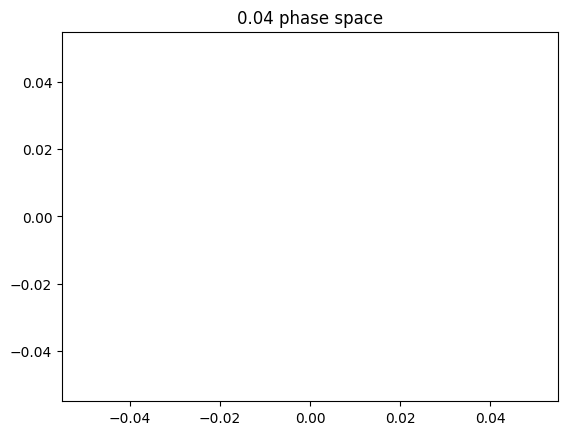

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


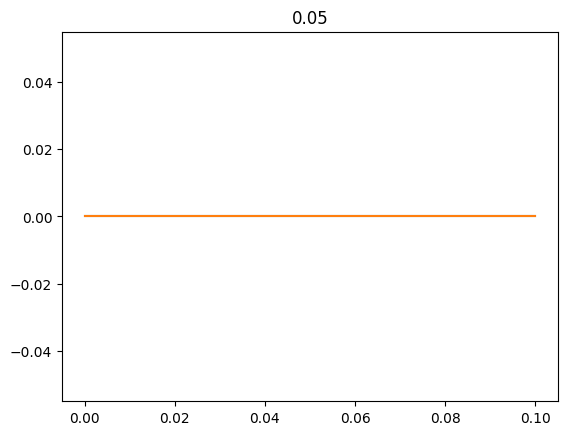

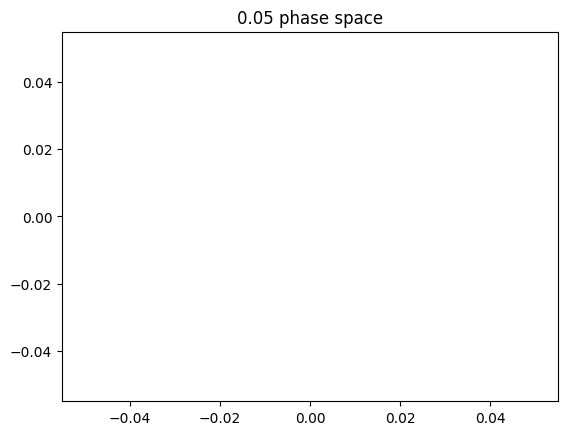

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


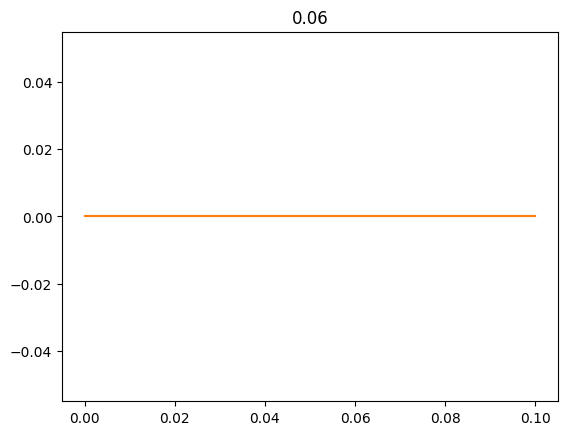

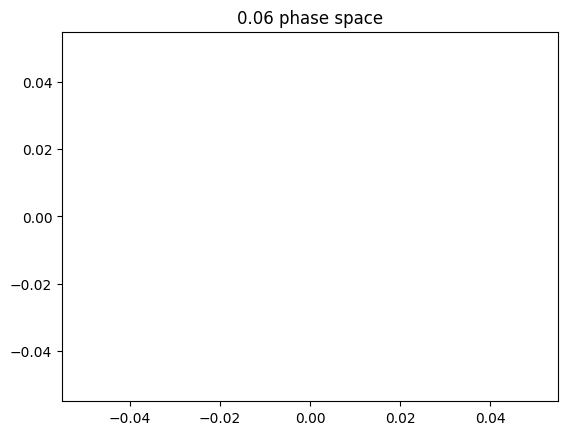

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


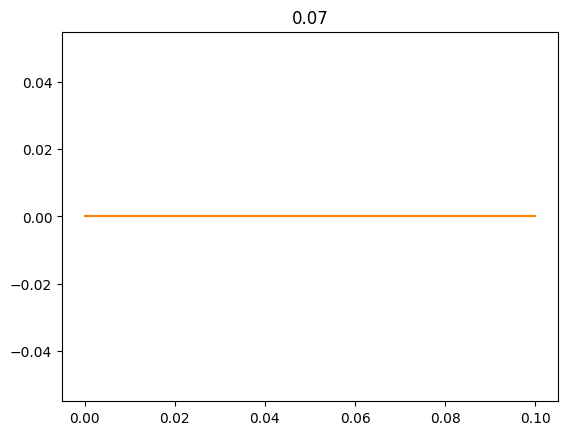

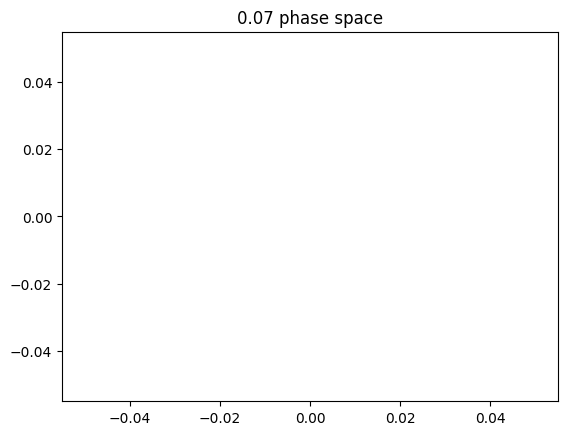

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


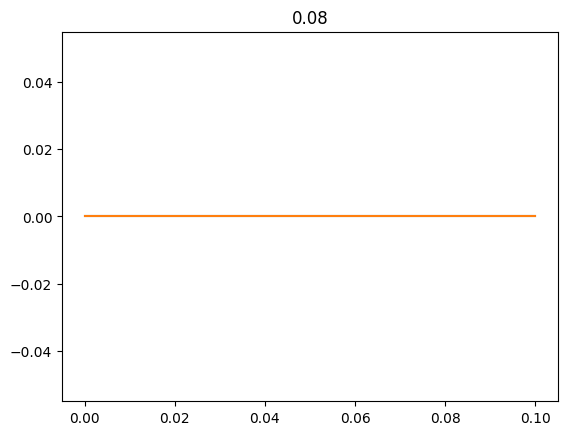

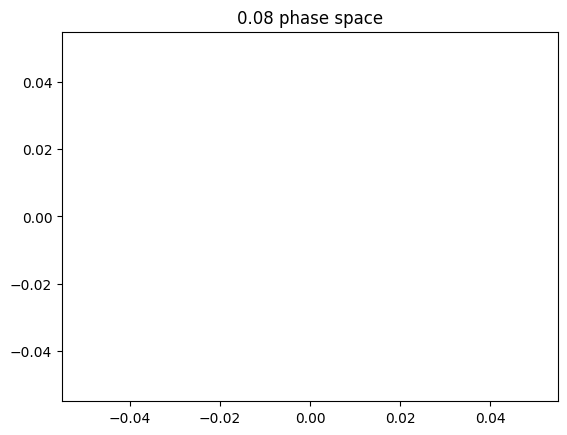

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


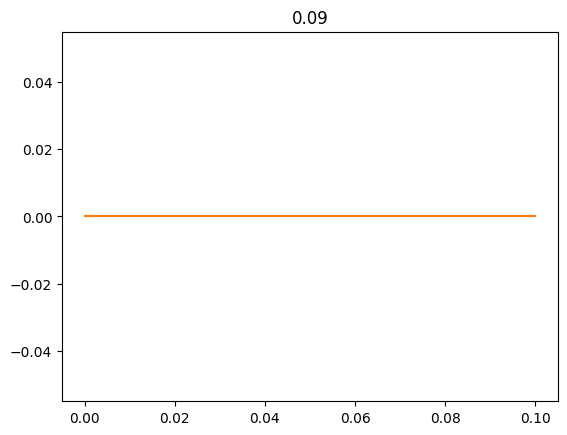

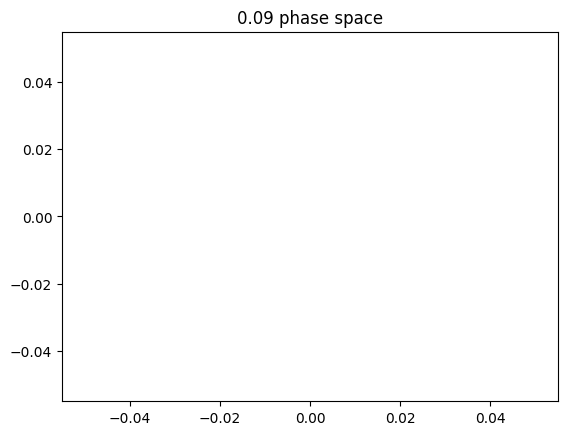

End
Show plot


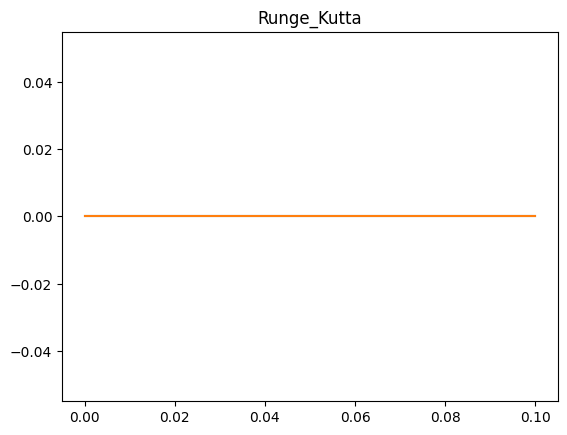

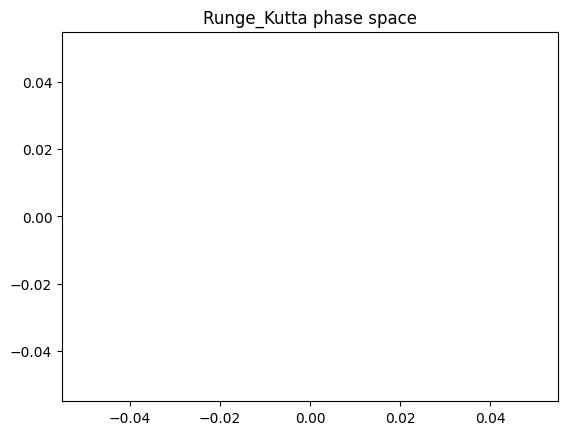

C:\Users\paco2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


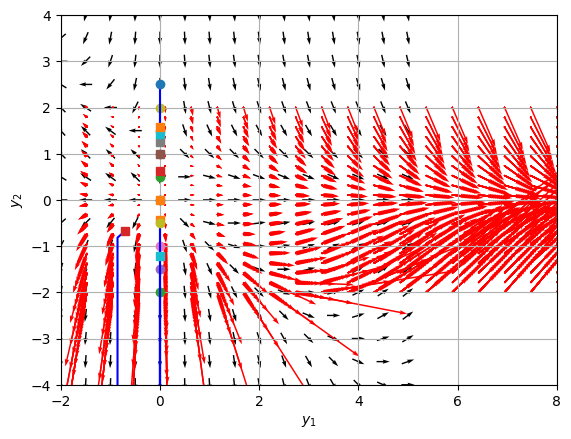

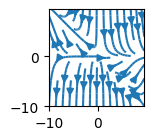

In [12]:

Test_Numerical(a=1,d=-1)


Nodo propio inestable a=-2, d=1

Matrix([[-1, 0], [0, -2]])
x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


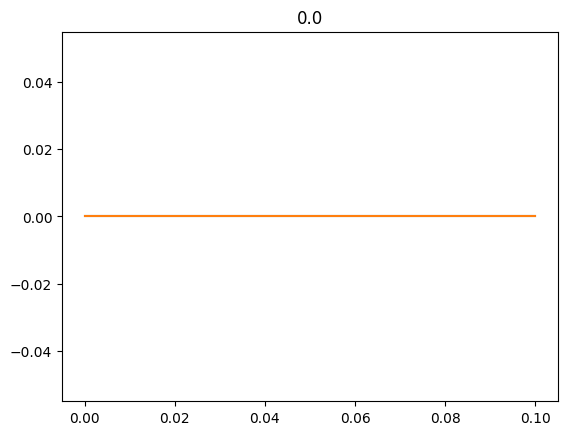

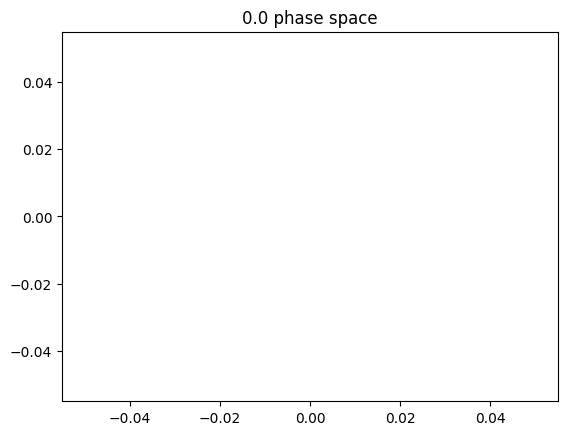

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


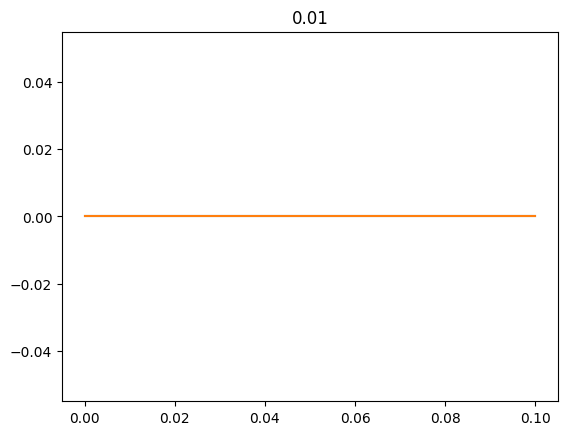

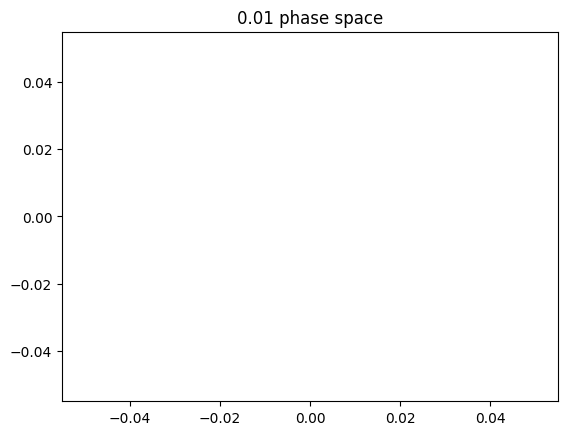

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


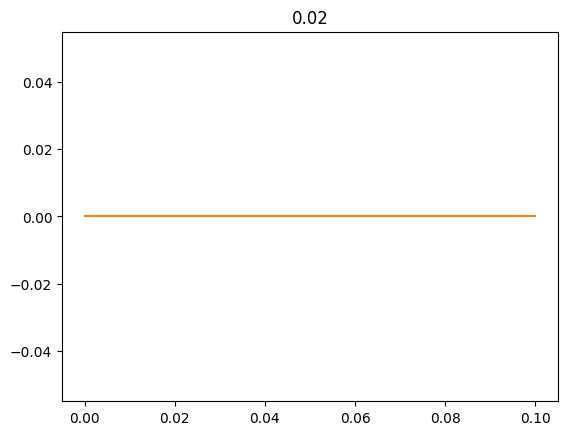

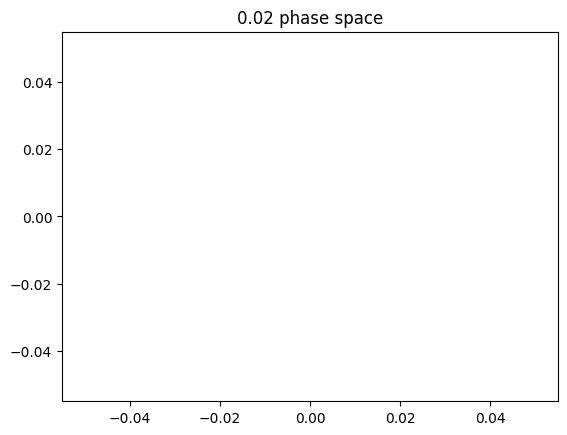

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


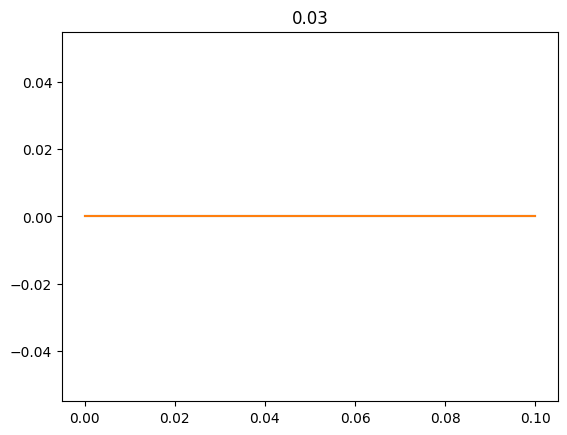

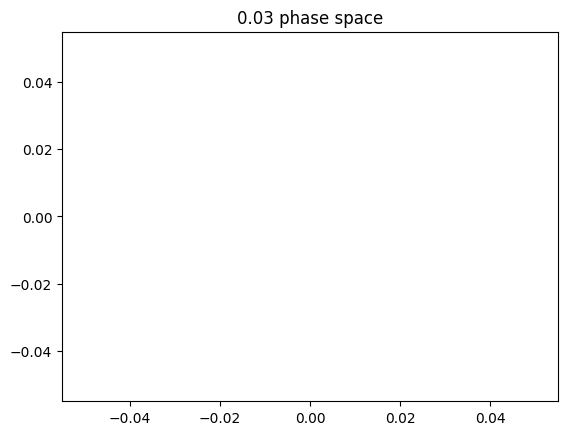

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


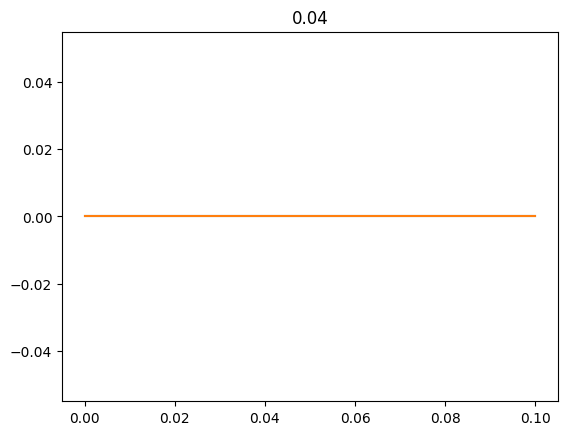

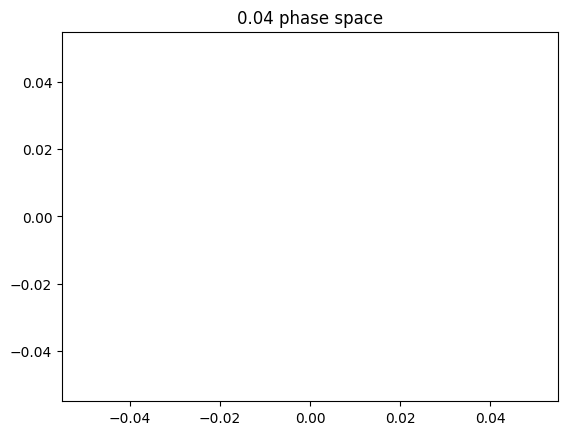

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


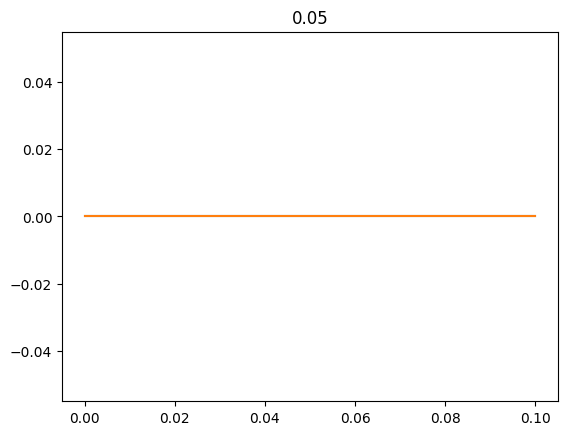

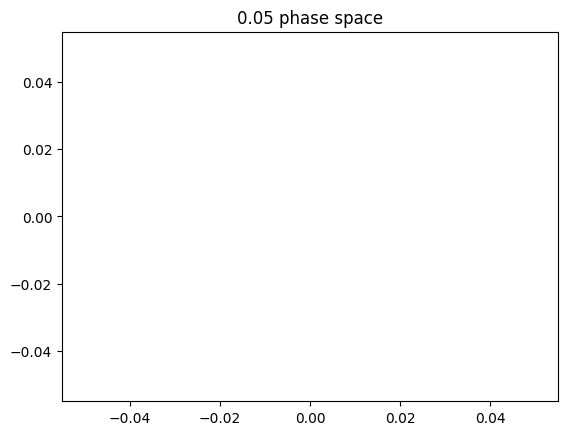

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


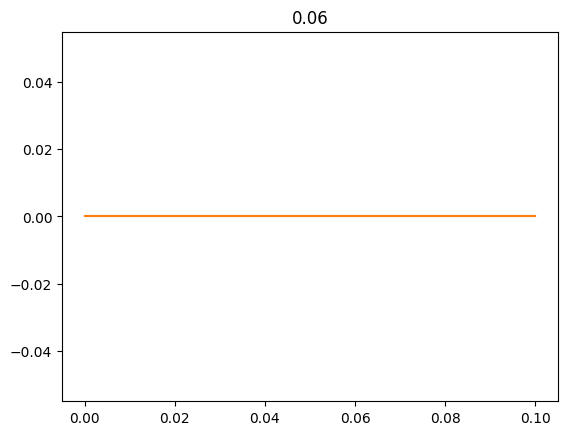

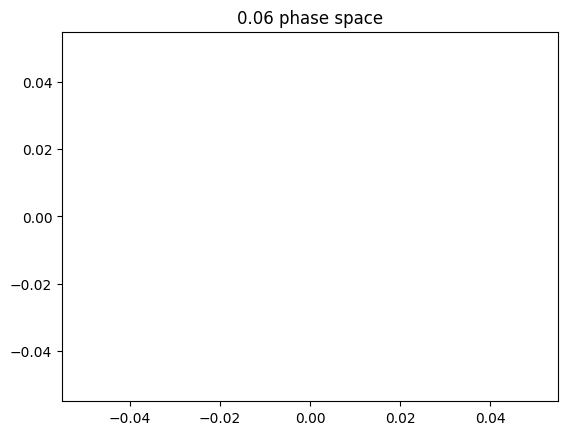

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


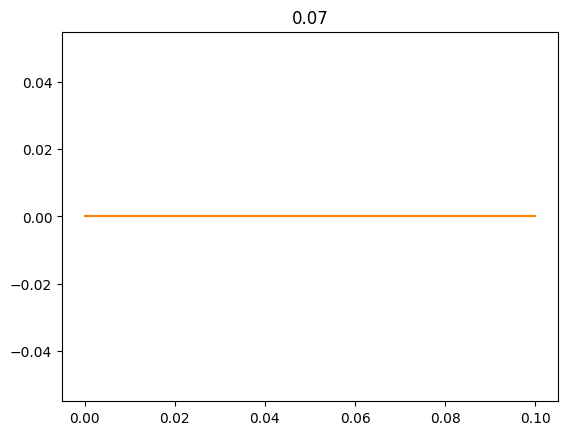

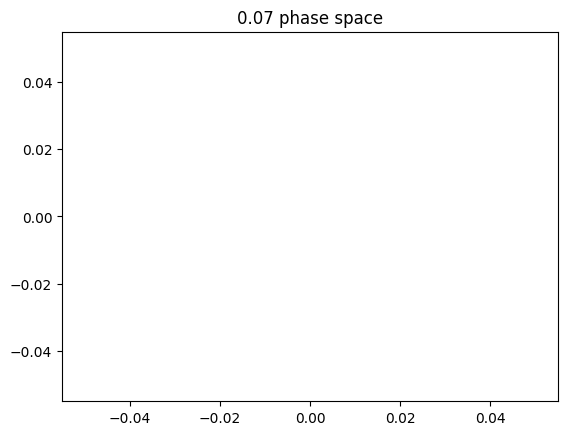

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


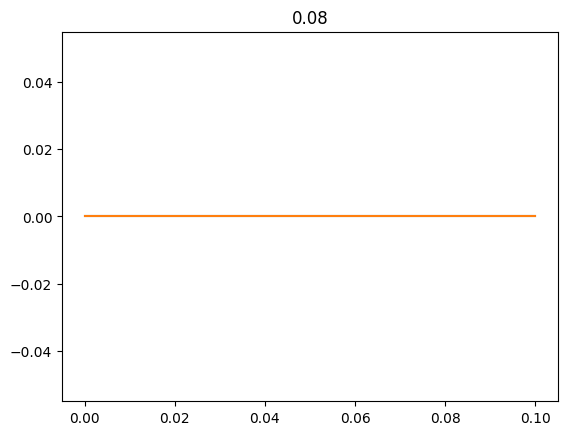

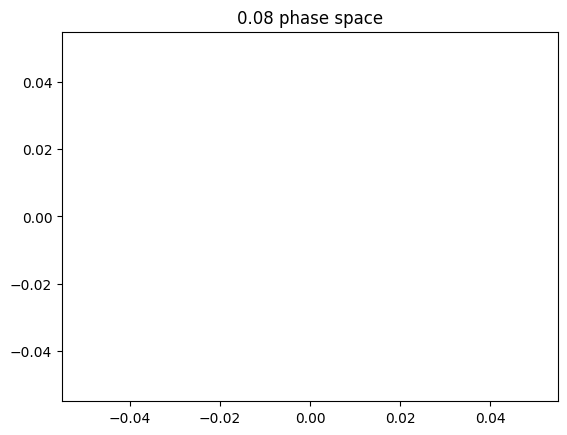

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


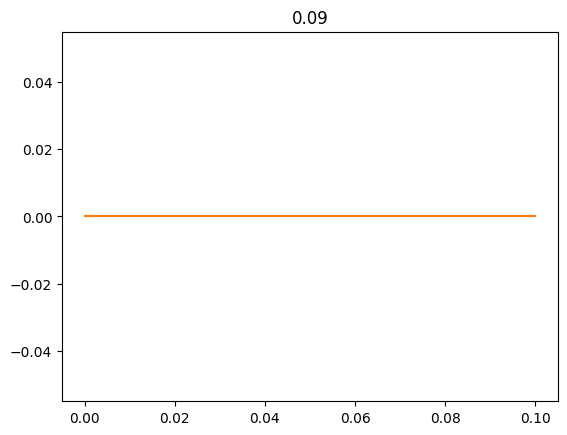

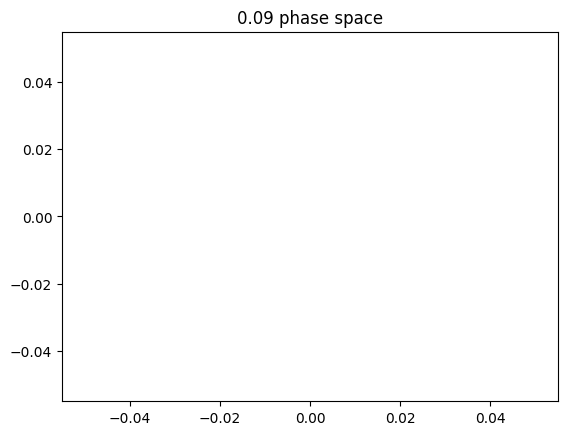

End
Show plot


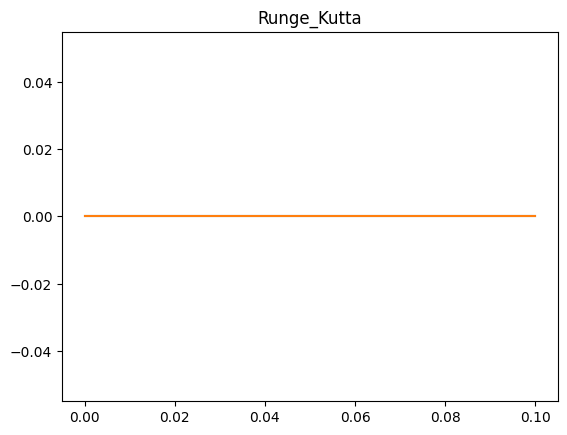

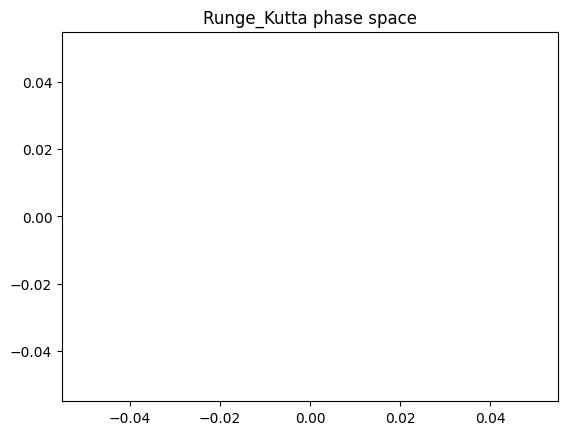

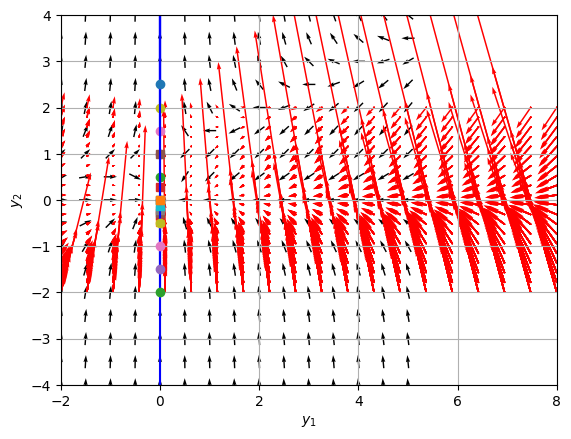

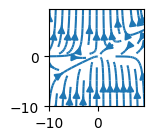

In [13]:
Test_Numerical(a=-2,d=1)

Punto silla inestable
a=1
d=1

Matrix([[-1, 0], [0, 1]])
x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


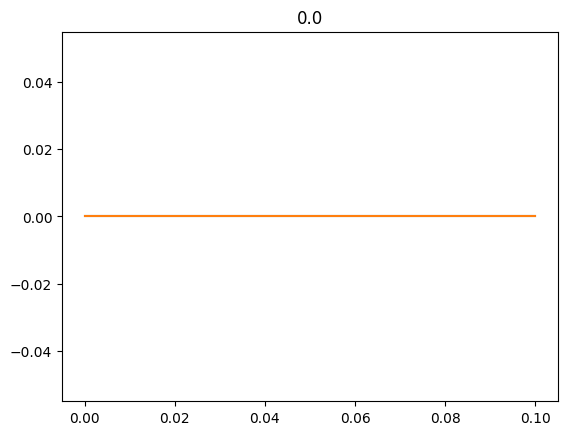

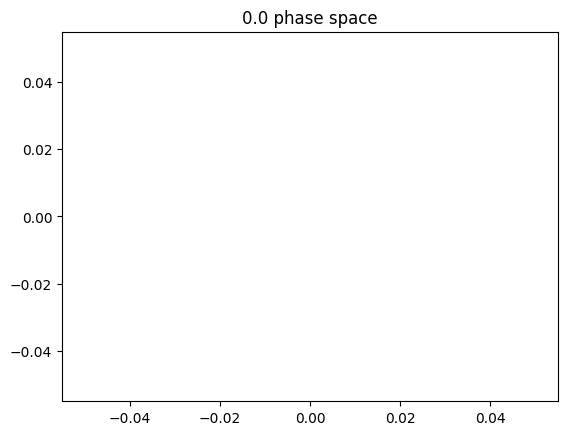

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


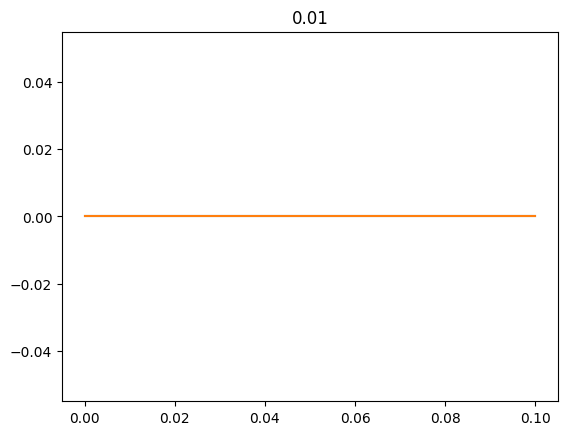

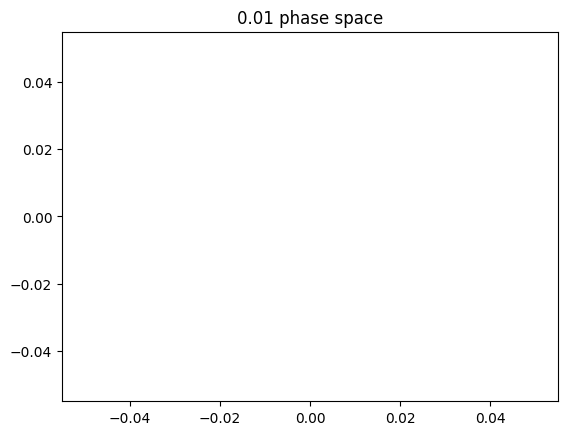

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


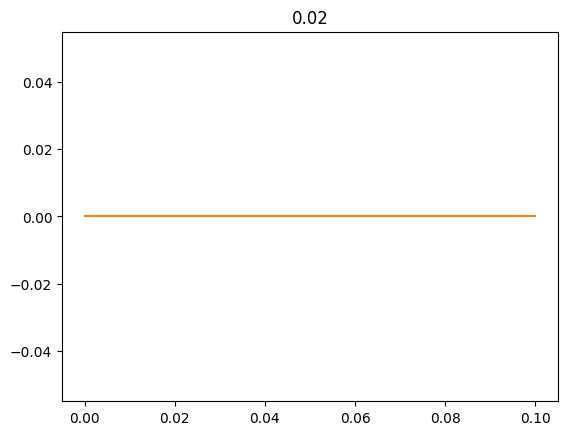

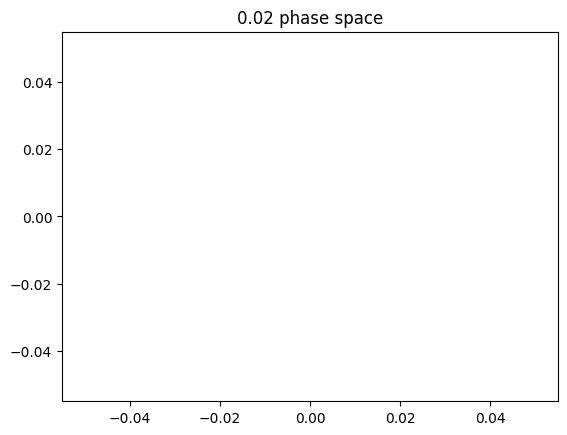

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


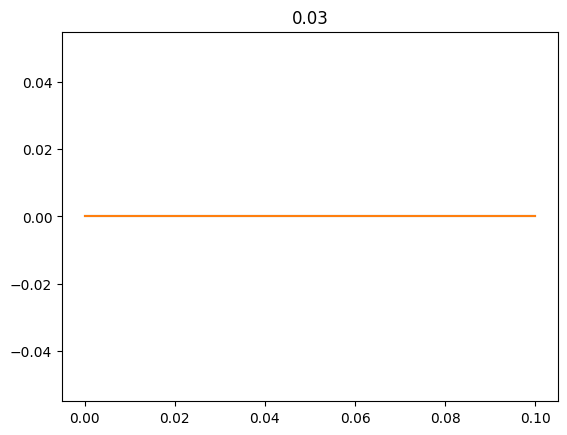

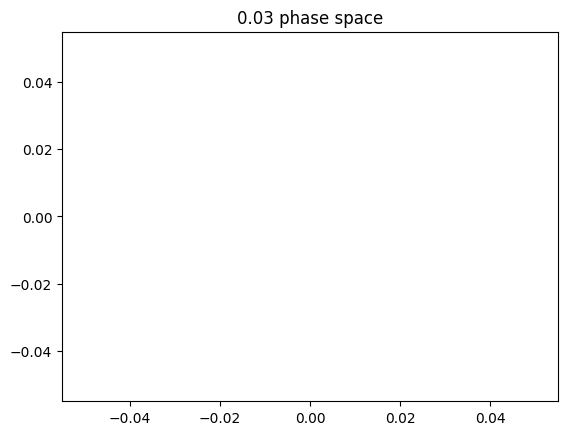

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


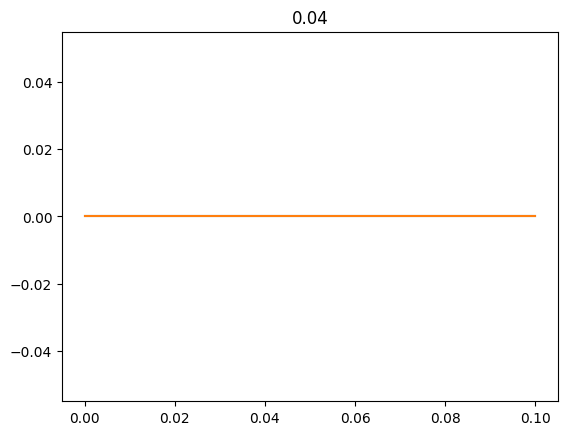

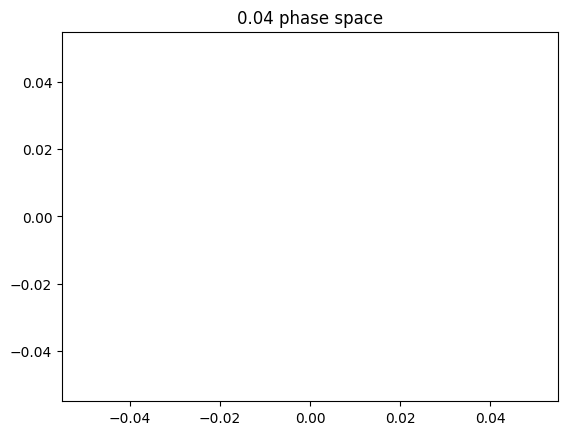

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


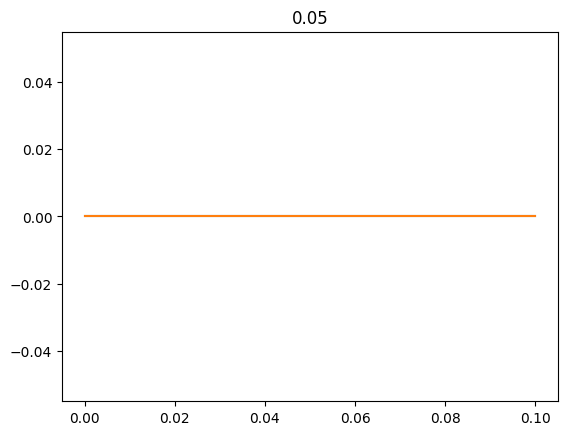

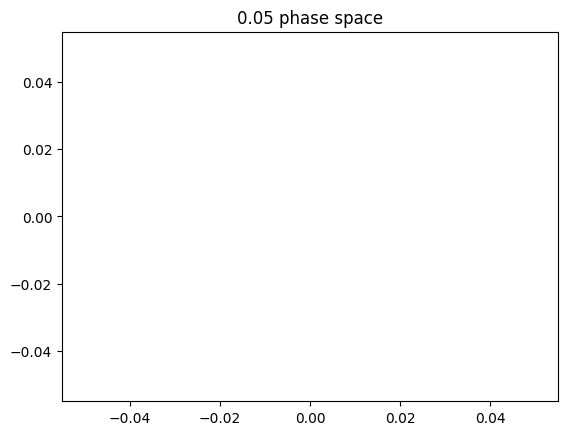

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


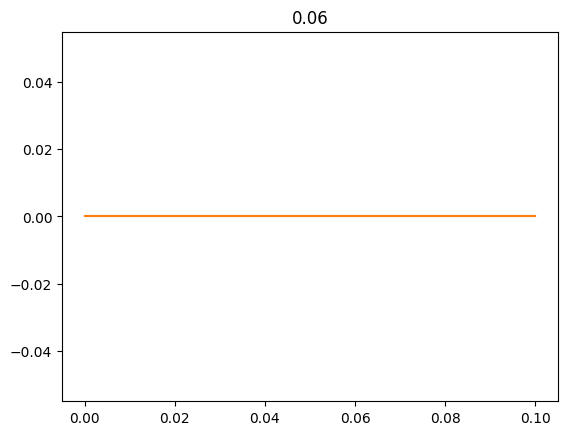

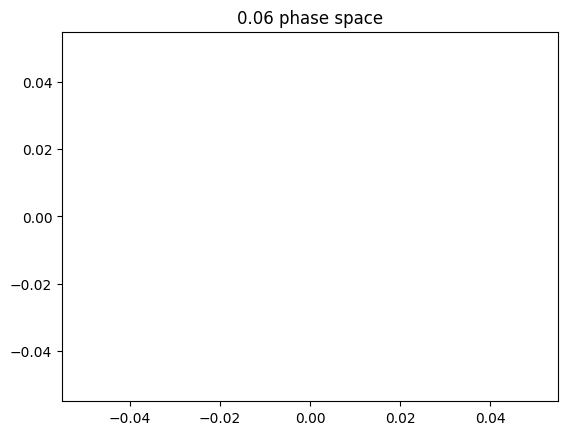

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


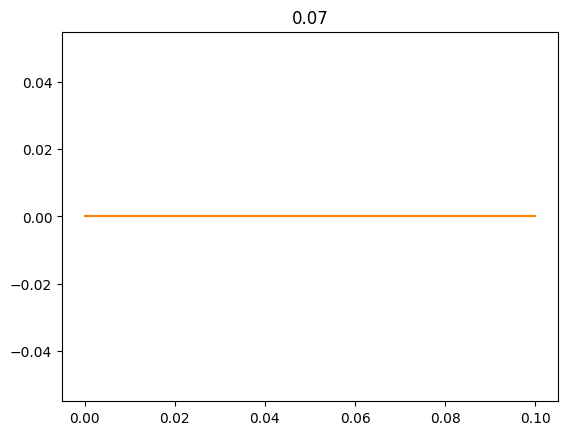

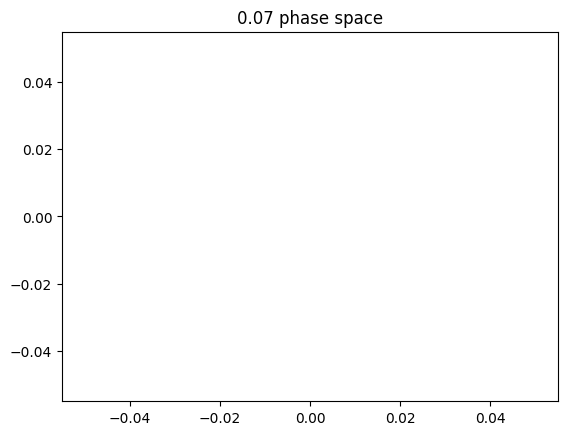

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


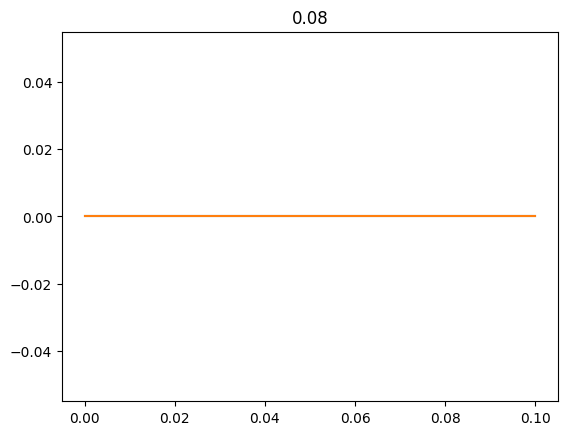

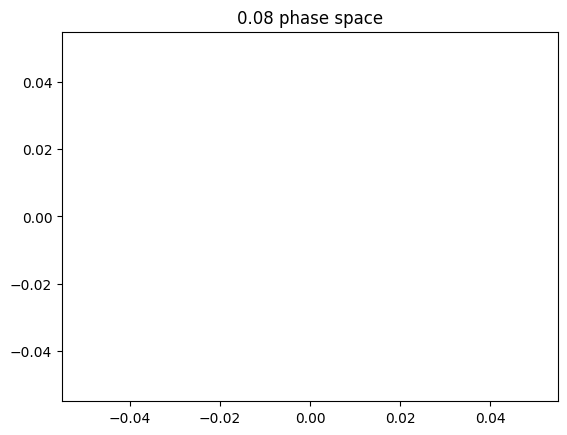

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


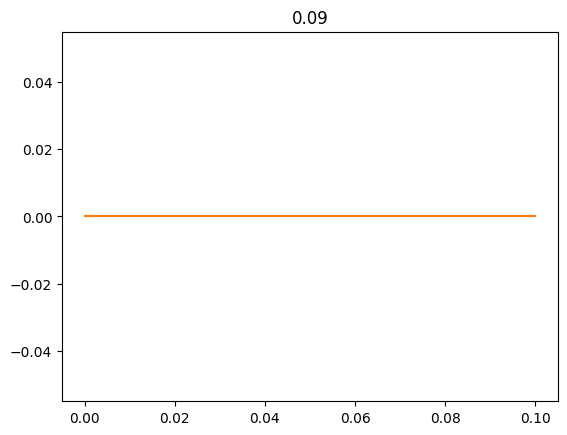

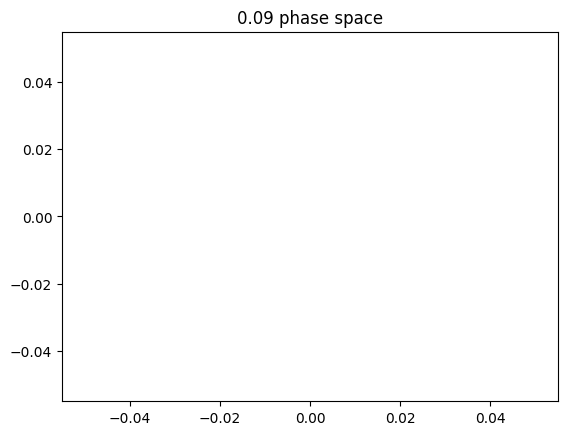

End
Show plot


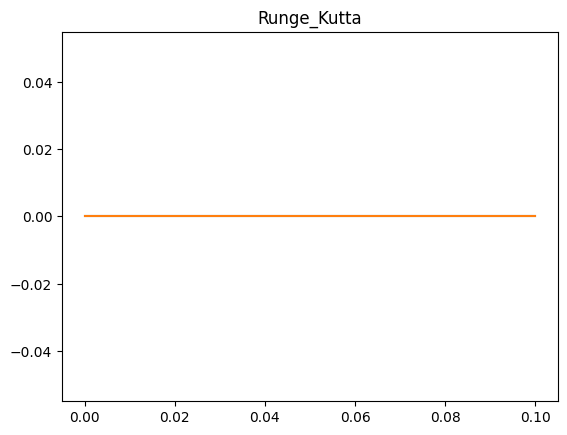

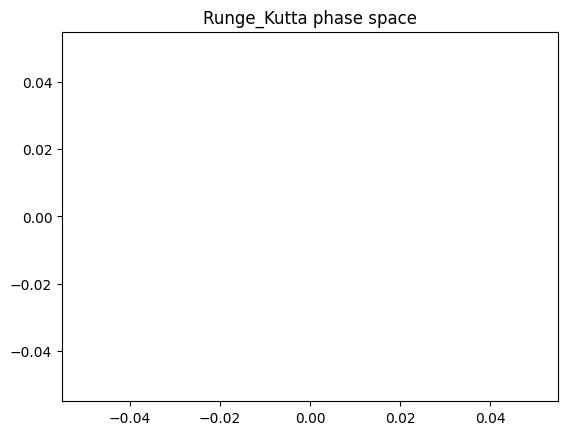

C:\Users\paco2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


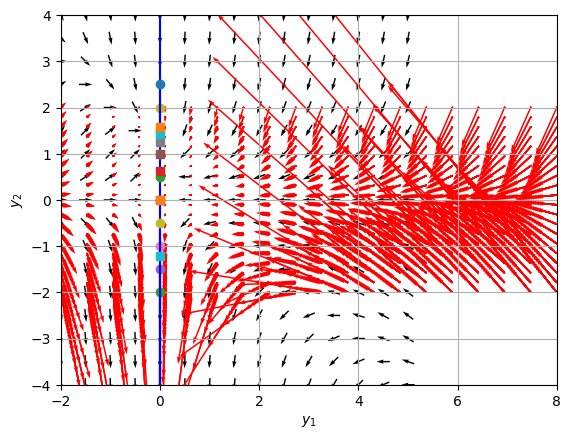

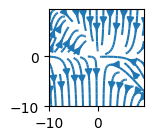

In [14]:
Test_Numerical(a=1,d=1)

Nodo impropio inestable
a=1
d=-2

Matrix([[2, 0], [0, 1]])
x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


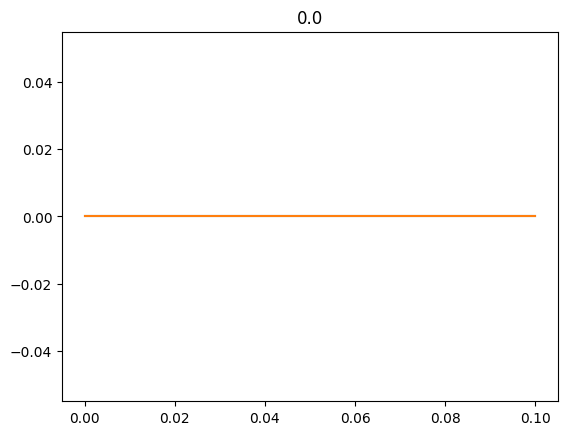

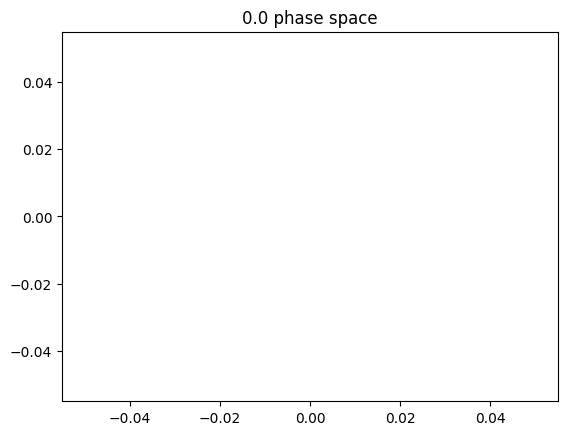

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


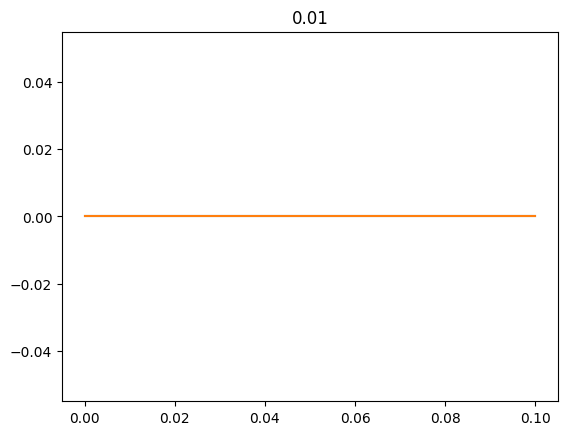

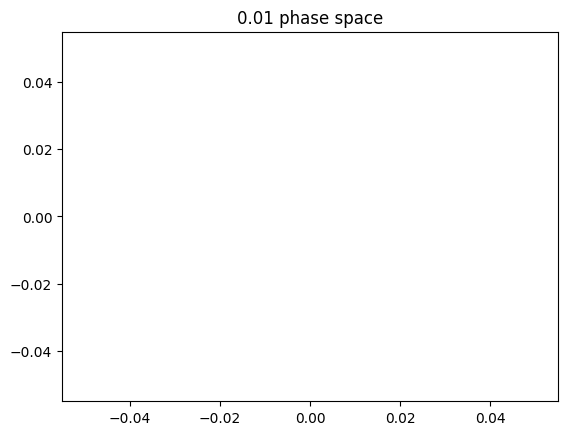

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


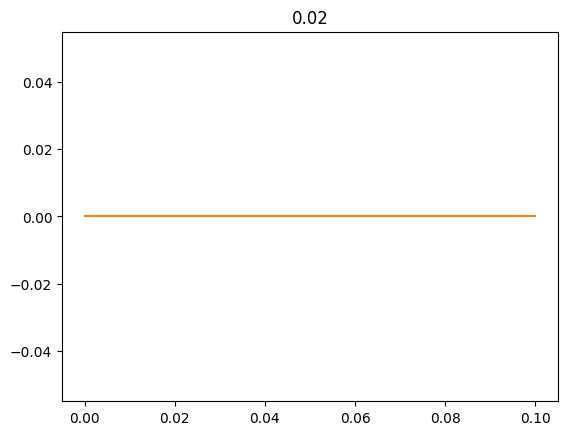

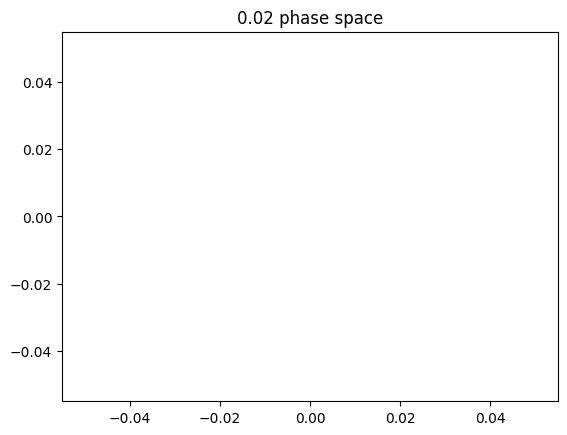

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


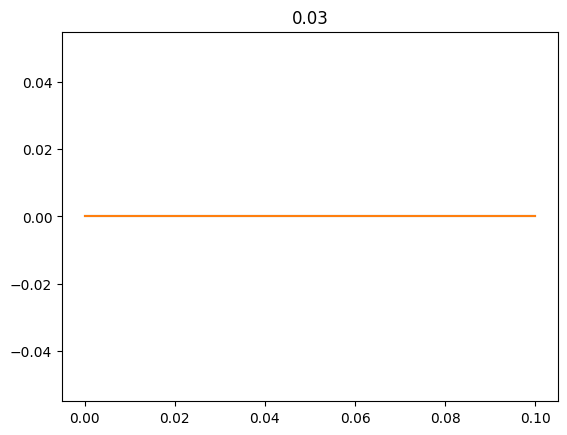

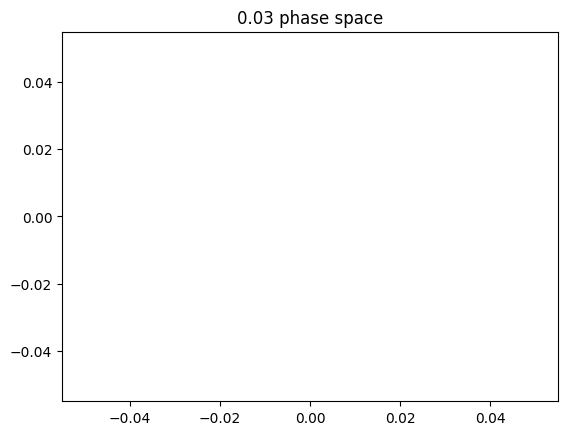

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


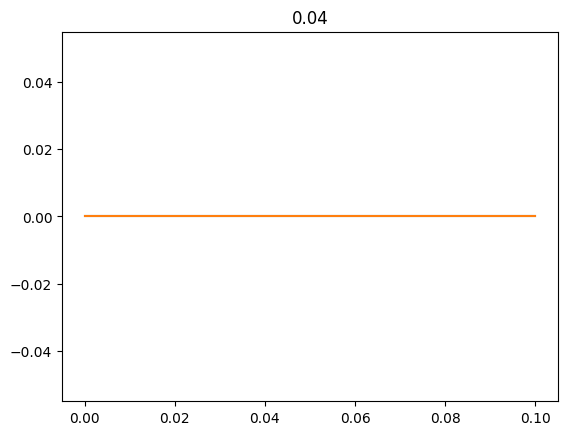

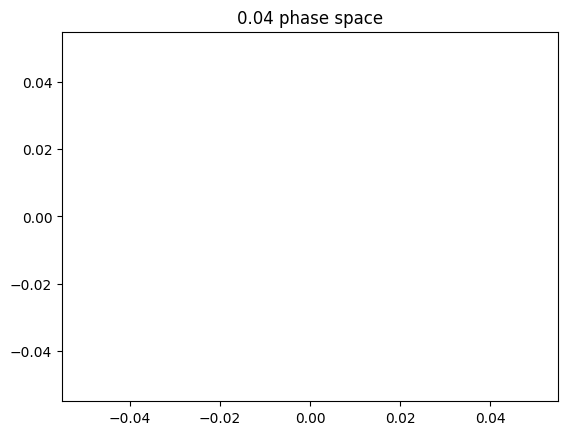

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


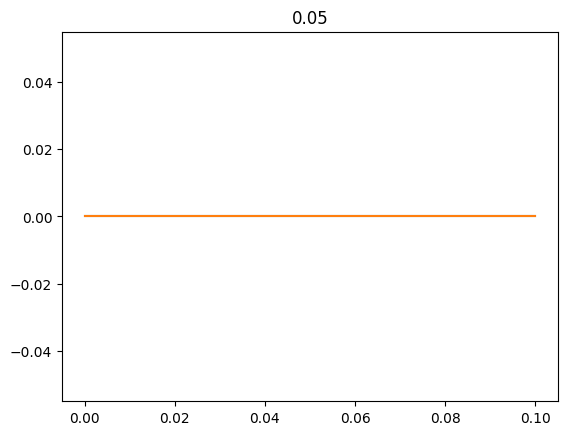

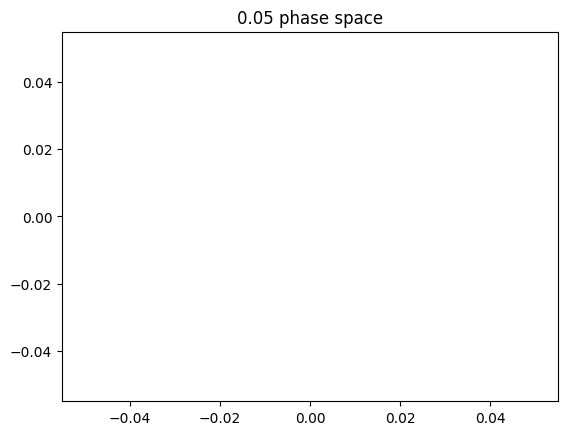

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


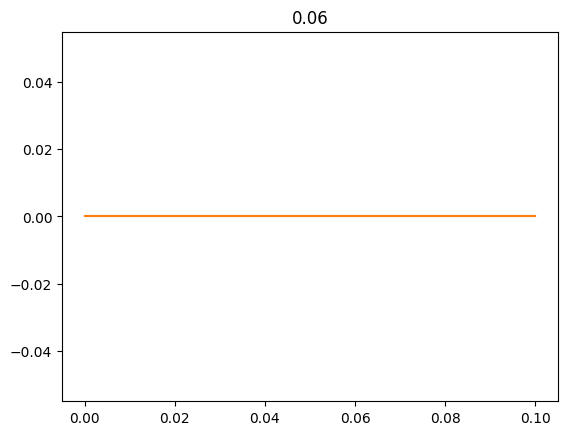

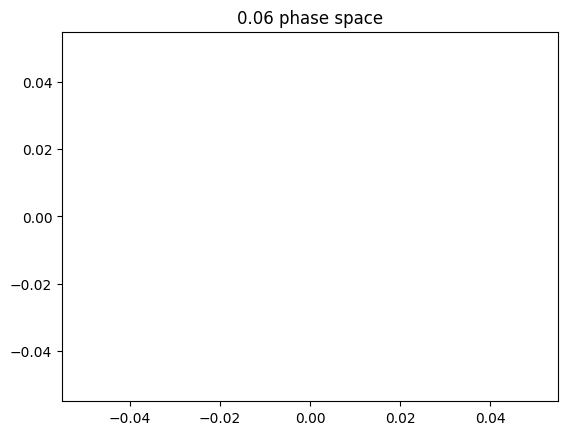

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


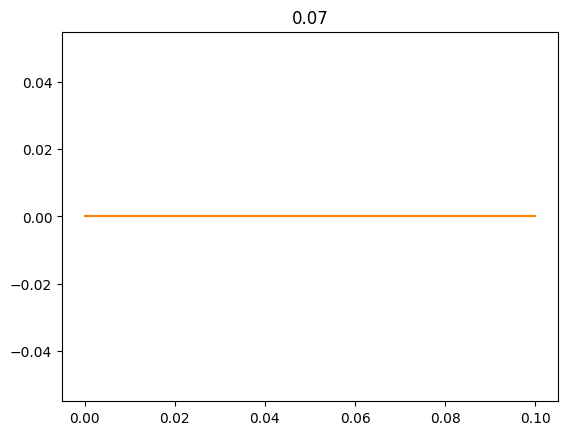

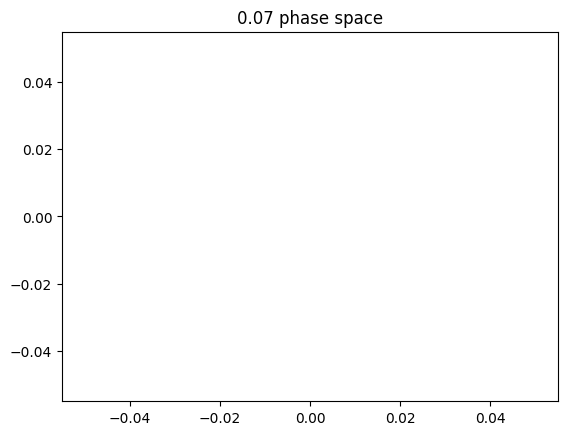

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


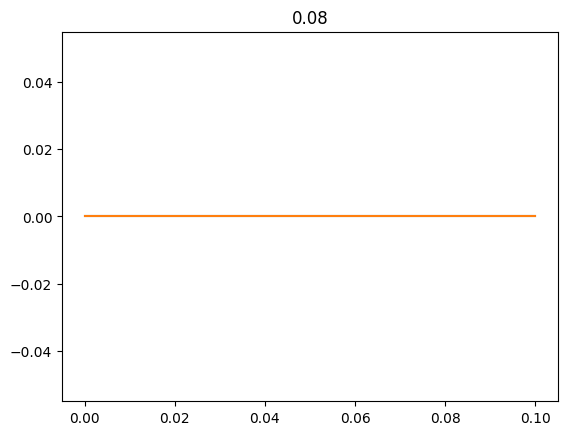

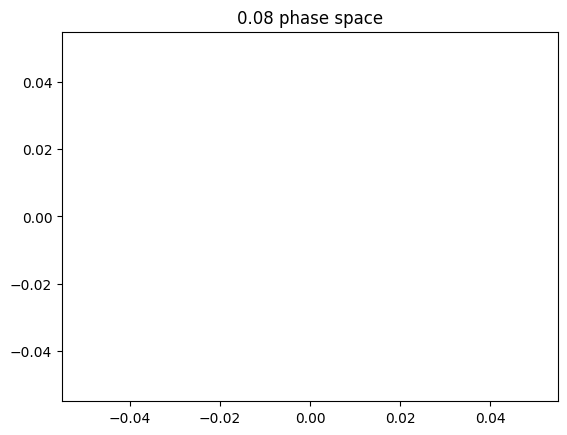

x values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Show plot


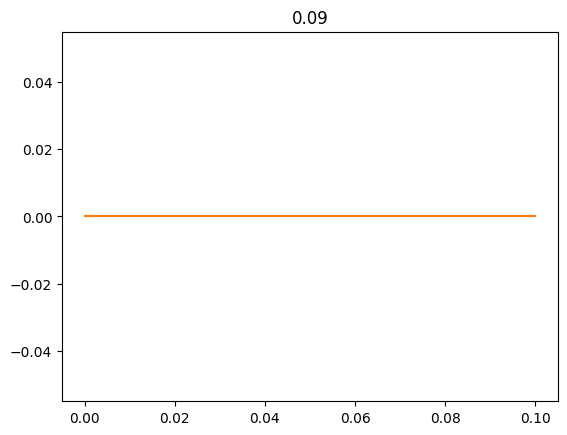

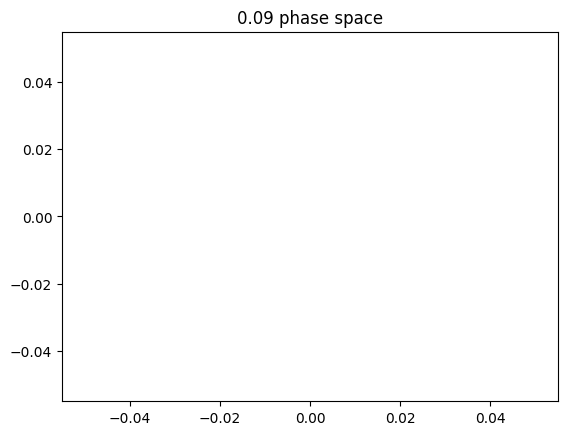

End
Show plot


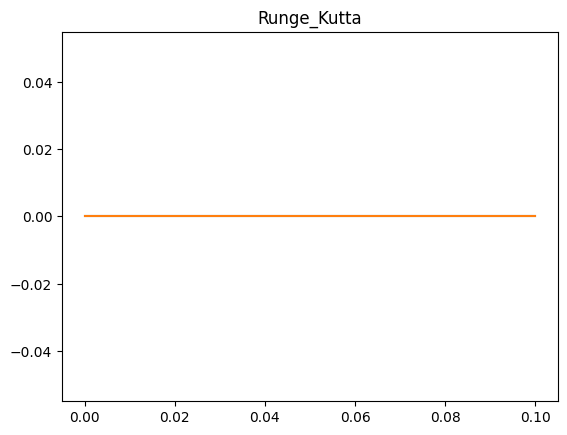

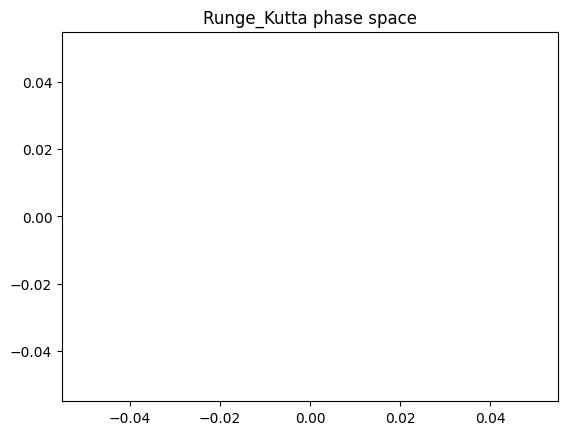

C:\Users\paco2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


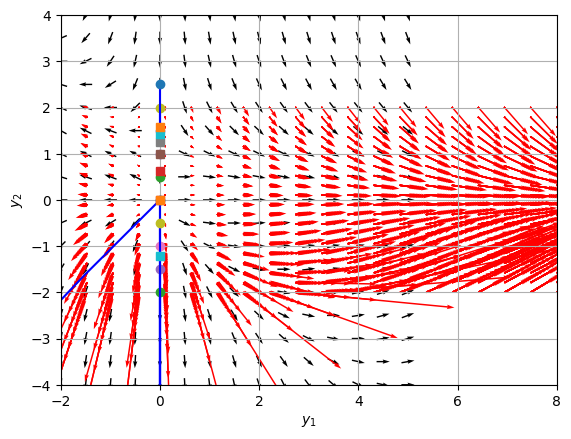

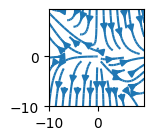

In [15]:
Test_Numerical(a=1,d=-2)

Correr para diferentes valores tanto en Runge-Kutta 4 como en Euler Modificado

Expresar ejemplo desde el 0,0  hasta     100 con h=1

Matrix([[-1, 0], [0, 1]])
End
Show plot


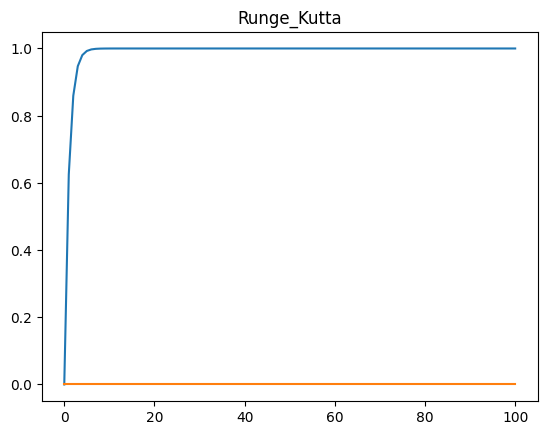

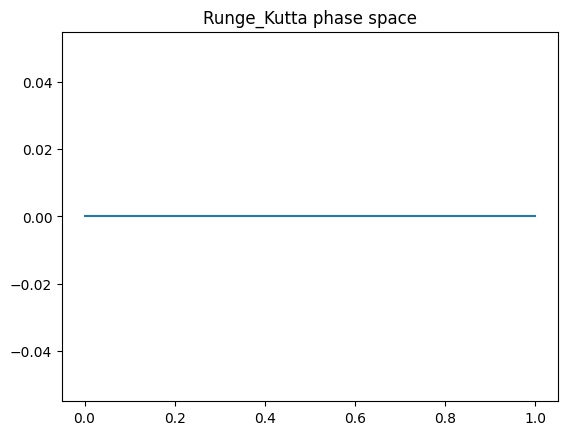

C:\Users\paco2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


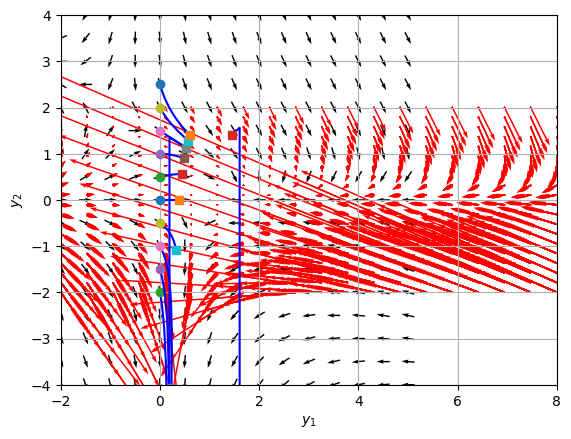

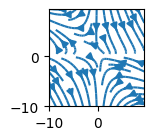

Matrix([[-1, 0], [0, 1]])
End
Show plot


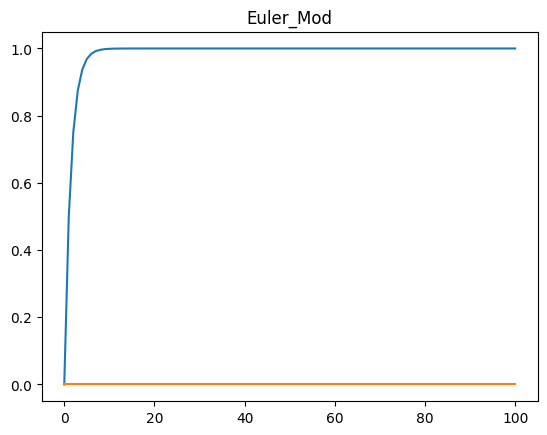

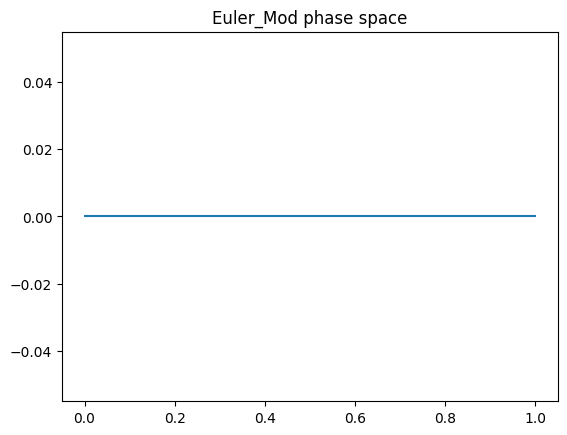

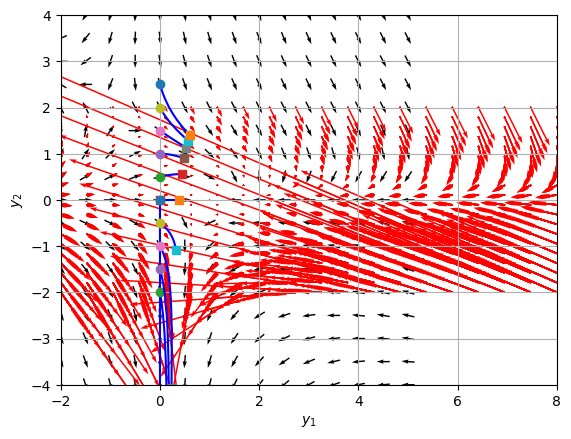

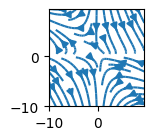

In [22]:
Test_Numerical(a = 1, b= 1, d=1, o = 1,
               w = 1, inicio = 0, fin = 100,
               h = 1, print_Cycle= False,Use_The_other_To=True)

Tomar un valor inicial de y=2x con x=100   parada en 10 tamaño paso 1

x0=100 y0=200

Matrix([[-1, 0], [0, 1]])


C:\Users\paco2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\py_expression_eval\__init__.py:237: RuntimeWarning: overflow encountered in double_scalars
  return a * b
C:\Users\paco2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\py_expression_eval\__init__.py:234: RuntimeWarning: invalid value encountered in double_scalars
  return a - b


End
[ 1.00000000e+02 -9.34283984e+32            -inf             nan
             nan             nan             nan             nan
             nan             nan             nan]
x values
[ 2.00000000e+02 -1.82662843e+33             nan             nan
             nan             nan             nan             nan
             nan             nan             nan]
y values
Show plot


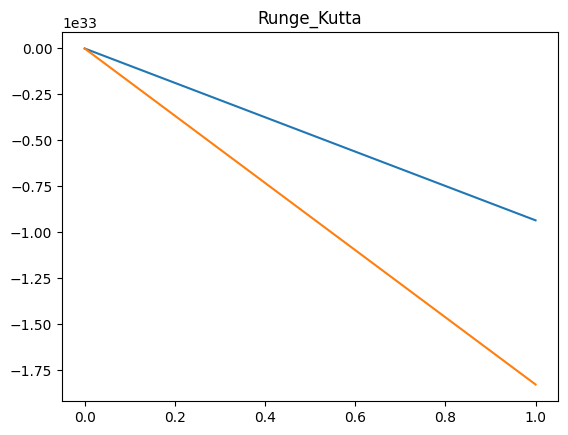

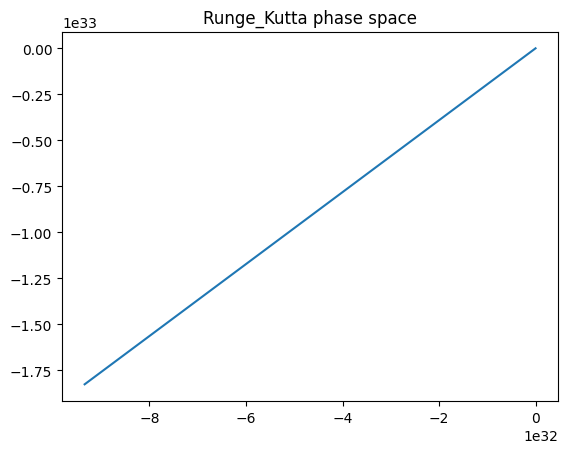

C:\Users\paco2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


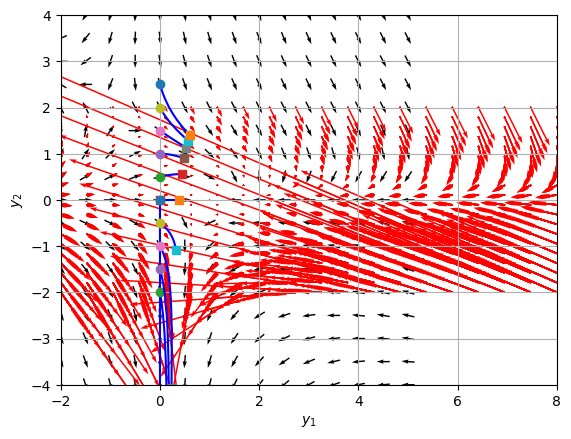

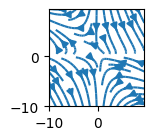

Matrix([[-1, 0], [0, 1]])
End
[ 1.00000000e+002 -5.96029750e+008 -7.37156607e+035 -1.72475362e+144
             -inf              nan              nan              nan
              nan              nan              nan]
x values
[ 2.00000000e+002 -1.18010970e+009 -1.45953397e+036 -3.41492767e+144
              nan              nan              nan              nan
              nan              nan              nan]
y values
Show plot


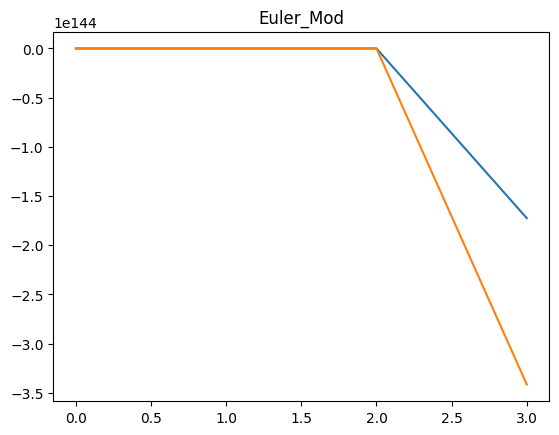

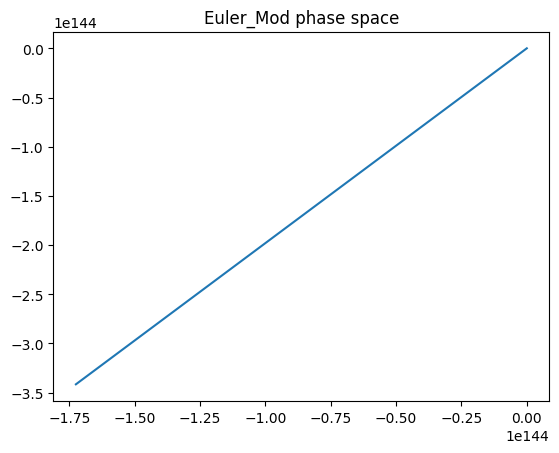

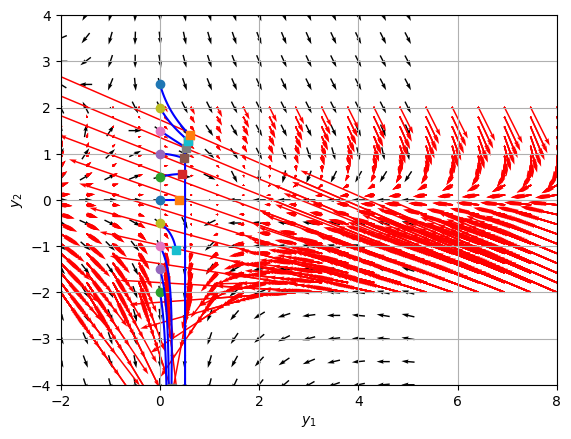

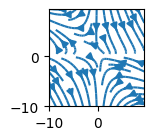

In [30]:
Test_Numerical(a = 1, b= 1, d=1, o = 1,
               w = 1, inicio = 0, fin = 10,
               h = 1,x0=100,y0=200,
               print_Cycle= False,Use_The_other_To=True)